In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\breed_labels.csv
data\color_labels.csv
data\pets_prepared.csv
data\state_labels.csv


# Exploratory Data Analysis

## Problem Statement
To predict adoption rate and better understand the adopter’s preferences.

## Introduction

The data source for this project was obtained from PetFinder.my, which has been Malaysia’s leading pet
adoption portal since 2008 with a database of more than 150,000 animals. The prepared dataset
included tabular data, with text inputs included.

In [2]:
df = pd.read_csv("data/pets_prepared.csv")
df.head()

,PetID,AdoptionSpeed,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,...,HealthName,VaccinatedName,DewormedName,SterilizedName,BreedName,BreedBinsName,StateName,StateBinsName,ColorName,AdoptedName
0,86e1089a3,2,2,Nibble,3,299,0,1,1,7,...,Healthy,No,No,No,Tabby,Tabby,Selangor,Selangor,Black,Y
1,6296e909a,0,2,No Name Yet,1,265,0,1,1,2,...,Healthy,Not Sure,Not Sure,Not Sure,Domestic Medium Hair,Domestic Medium Hair,Kuala Lumpur,Kuala Lumpur,Black,Y
2,3422e4906,3,1,Brisco,1,307,0,1,2,7,...,Healthy,Yes,Yes,No,Mixed Breed,Mixed Breed,Selangor,Selangor,Brown,Y
3,5842f1ff5,2,1,Miko,4,307,0,2,1,2,...,Healthy,Yes,Yes,No,Mixed Breed,Mixed Breed,Kuala Lumpur,Kuala Lumpur,Black,Y
4,850a43f90,2,1,Hunter,1,307,0,1,1,0,...,Healthy,No,No,No,Mixed Breed,Mixed Breed,Selangor,Selangor,Black,Y


In [3]:
breed_labels = pd.read_csv("data/breed_labels.csv")
breed_labels

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita
...,...,...,...
302,302,2,Torbie
303,303,2,Tortoiseshell
304,304,2,Turkish Angora
305,305,2,Turkish Van


In [4]:
color_labels = pd.read_csv("data/color_labels.csv")
color_labels

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream
5,6,Gray
6,7,White


In [5]:
state_labels = pd.read_csv("data/state_labels.csv")
state_labels

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan
5,41324,Melaka
6,41332,Negeri Sembilan
7,41335,Pahang
8,41330,Perak
9,41380,Perlis


In [6]:
df.columns

Index(['PetID', 'AdoptionSpeed', 'Type', 'Name', 'Age', 'Breed1', 'Breed2',
       'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength',
       'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee',
       'State', 'RescuerID', 'VideoAmt', 'PhotoAmt', 'Description', 'AgeBins',
       'FeeBins', 'BreedBins', 'StateBins', 'VideoAmtBins', 'PhotoAmtBins',
       'QuantityBins', 'BreedPure', 'ColorAmt', 'NameorNO', 'Adopted',
       'TypeName', 'GenderName', 'MaturitySizeName', 'FurLengthName',
       'HealthName', 'VaccinatedName', 'DewormedName', 'SterilizedName',
       'BreedName', 'BreedBinsName', 'StateName', 'StateBinsName', 'ColorName',
       'AdoptedName'],
      dtype='object')

In [7]:
df.shape

(14993, 49)

There are a total of 14993 samples in this dataset, with 49 columns, AdoptionSpeed being the main predictor used to quantify pet adoption rates.

In [3]:
df.describe()

,AdoptionSpeed,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,ColorAmt,Adopted
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,...,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,2.516441,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,...,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,1.994531,0.720069
std,1.177265,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,...,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,0.768734,0.448980
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,1.000000,0.000000
50%,2.000000,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,...,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000,1.000000
75%,4.000000,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,...,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,3.000000,1.000000
max,4.000000,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,...,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,3.000000,1.000000


In [4]:
df.describe(exclude="int64")

,PetID,Name,RescuerID,Description,AgeBins,FeeBins,BreedBins,StateBins,VideoAmtBins,PhotoAmtBins,...,HealthName,VaccinatedName,DewormedName,SterilizedName,BreedName,BreedBinsName,StateName,StateBinsName,ColorName,AdoptedName
count,14993,14985,14993,14980,14993,14993,14993,14993,14993,14993,...,14993,14993,14993,14993,14988,14993,14993,14993,14993,14993
unique,14993,9059,5595,14003,7,4,7,7,3,7,...,3,3,3,3,175,7,14,7,7,2
top,86e1089a3,No Name,fa90fa5b1ee11c86938398b60abc32cb,For Adoption,"[ 3, 6)",0,307,41326,0,1,...,Healthy,No,Yes,No,Mixed Breed,Mixed Breed,Selangor,Selangor,Black,Y
freq,1,1311,459,164,3670,12663,5927,8714,14419,3075,...,14478,7227,8397,10077,5927,5927,8714,8714,7427,10796


In [8]:
df.duplicated().sum()

0

With reference to all columns there are no duplicates in this dataset. 

In [9]:
df.isna().sum()[lambda x: x>0]

Name            8
Description    13
BreedName       5
dtype: int64

There are 3 columns with "NaN" or invalid data, namely the Name, Description and BreedName columns. This will be addressed when performing the EDA on each column more closely in the next section.

## Column by Column Analysis

### PetID

In [10]:
df.PetID.nunique() == len(df)

True

PetID is the unique hash for each pet profile. We have verified that there are as many unique values as there are total number of samples, hence this description of the PetID as being a non-repeated key to tag each pet profile is true.

### AdoptionSpeed

In [6]:
order = df.AdoptionSpeed.unique()
order

array([2, 0, 3, 1, 4])

In [7]:
order = order[[1,3,0,2,4]]

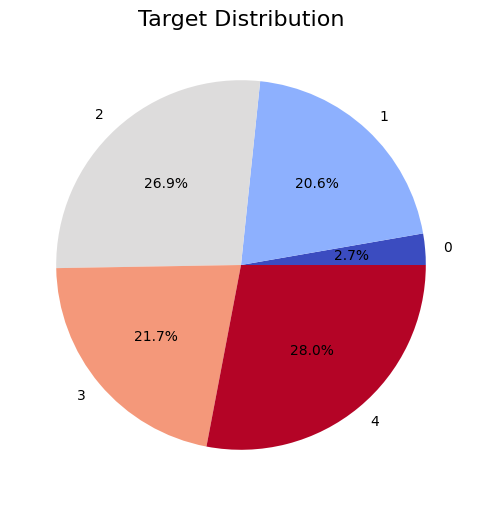

In [8]:
plt.figure(figsize=(6,6))
colors = plt.cm.coolwarm(np.linspace(0, 1, 5))
class_counts = df.AdoptionSpeed.value_counts()[order]

plt.pie(class_counts, labels=class_counts.index, autopct="%1.1f%%",
        colors=colors)

plt.title('Target Distribution', fontsize=16)
plt.show()

Categorical speed of adoption. Lower is faster. This is the value to predict. The value is determined by how quickly, if at all, a pet is adopted. The values are determined in the following way:
* 0 - Pet was adopted on the same day as it was listed.
* 1 - Pet was adopted between 1 and 7 days (1st week) after being listed.
* 2 - Pet was adopted between 8 and 30 days (1st month) after being listed.
* 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
* 4 - No adoption after 100 days of being listed. *(There are no pets in this dataset that waited between 90 and 100 days).*

The distribution is mostly even for categories 1 to 4 but pets adopted on the same day as it was listed only make up 2.7% of the dataset. From a quantitative standpoint, the lower the number of days between listing and adoption, the higher the adoption rate which is the metric we are targeting. It may be worth investigating how this could be the case as this would be ideal assuming such fast adoption rate may be due to some anomaly, or could be an error in data recording.

### Type

In [9]:
Type_value_counts = df.TypeName.value_counts()
Type_value_counts

TypeName
Dog    8132
Cat    6861
Name: count, dtype: int64

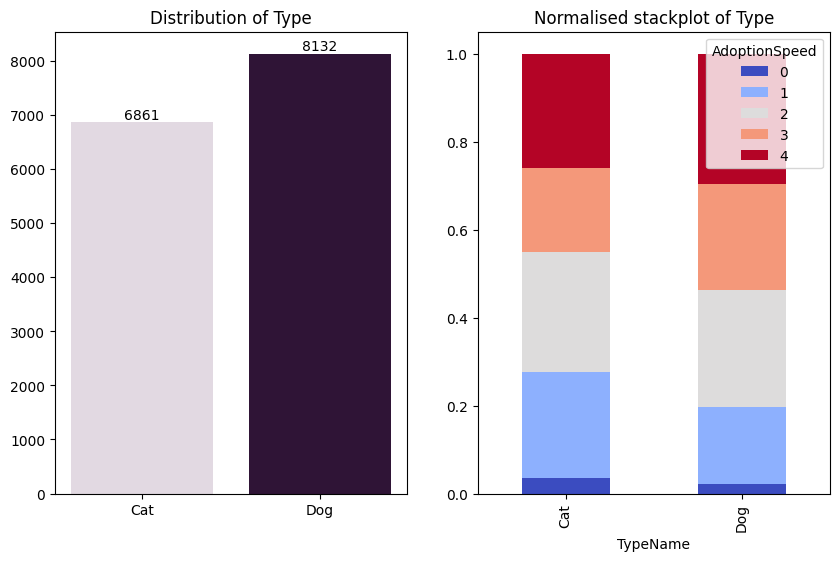

In [10]:
fig, axs = plt.subplots(1,2,figsize=(10,6))
target = "AdoptionSpeed"
p = axs[0].bar(height=Type_value_counts.sort_index().values, 
                x=Type_value_counts.sort_values().index,
                    color = plt.cm.twilight(np.linspace(0, 1, 3)))
axs[0].bar_label(p)
Type_df = df.groupby("TypeName")[target].value_counts(normalize=True).unstack()[order]
Type_df.plot.bar(stacked=True,color = colors,ax = axs[1])

axs[0].set_title(f"Distribution of Type")
axs[1].set_title(f"Normalised stackplot of Type")
plt.show()

Type refers to the species of animal, with a total being only two types: dogs and cats. There are more dogs than cats, with the proportion of cats being adopted sooner being more than dogs. 

### Name | NameorNO

The Name column is supposed to contain the names of the pets, with the NameorNO column supplementing the information by given a simple boolean yes/no value as to whether there was a name provided.

However a cursory examination of the column tells us there are some issues with this column that requires data cleaning and corrections.

In [11]:
df[["Name","NameorNO"]].head(20)

,Name,NameorNO
0,Nibble,Y
1,No Name Yet,N
2,Brisco,Y
3,Miko,Y
4,Hunter,Y
5,No Name,N
6,BULAT,Y
7,Siu Pak & Her 6 Puppies,Y
8,No Name,N
9,Kitty,Y


In [12]:
df[["Name","NameorNO"]][df["NameorNO"] == "N"].Name.unique()

array(['No Name Yet', 'No Name', 'Not Yet Named', 'Unnamed', 'No Names',
       'Not Yet', 'No Names Yet', 'Noname', 'Not Given Yet', 'Unamed',
       'Nil', 'Not Given', 'Not Named', 'NO NAME', 'Not Yet Name',
       'No Name Kitties', 'NIL', "No Name Yet, It's Up To The Owner",
       'NO NAME YET', 'No Named', 'No Name Yet (Must Neuter)',
       'No Name For Now', 'No Name 2'], dtype=object)

In [13]:
df[df['Name'].apply(lambda x: len(str(x))) > 20][["Name","NameorNO","Quantity"]].value_counts().head()

Name                               NameorNO  Quantity
5 Puppies For Adoption             Y         5           2
 Moji+Mango Ice+Mixed Fruit        Y         3           1
Nichi, Usha, Bob Dan Gure          Y         4           1
Noty, Dopin, Tateh, Momot, Oreo    Y         5           1
No Name Yet, It's Up To The Owner  N         1           1
Name: count, dtype: int64

In [14]:
df[df['Name'].apply(lambda x: len(str(x))) == 2][["Name","NameorNO"]].value_counts().tail(20)

Name  NameorNO
KT    Y           1
KK    Y           1
KD    Y           1
KC    Y           1
Jo    Y           1
JD    Y           1
J1    Y           1
IV    Y           1
H8    Y           1
H7    Y           1
H6    Y           1
H5    Y           1
H4    Y           1
H3    Y           1
H2    Y           1
H1    Y           1
GR    Y           1
G2    Y           1
G1    Y           1
Z4    Y           1
Name: count, dtype: int64

In [15]:
df[df['Name'].apply(lambda x: len(str(x))) == 4]["Name"].unique()

array(['Miko', 'Bear', 'Kali', 'Novy', 'Jack', 'Lego', 'Jasz', 'QiQi',
       'Coco', 'Cody', 'Lulu', 'Mimi', 'Girl', 'DIDO', 'Zoro', 'Ruby',
       'Milo', 'Kaka', 'Lily', 'Lady', 'Java', 'Oreo', 'Momo', 'Baby',
       'Oyen', 'Meme', 'Cici', 'Joey', 'Jojo', 'Mini', 'Miss', 'Cham',
       'Grey', 'Boys', 'Zizi', 'Mani', 'Taki', 'BOBO', 'Mung', 'Oren',
       'MAYA', 'Koko', 'Hero', 'KaKa', 'DIBA', 'Popo', 'Gina', 'Koji',
       'Ming', '2F2M', 'Tuah', 'Tiny', 'Mylo', 'Raju', 'Flea', 'Mike',
       'Ivan', 'Mint', 'Samm', 'Tofu', 'Opet', 'Kimi', 'Desa', 'Digi',
       'Lucy', 'Deaf', 'Nero', 'Kiki', 'Tora', 'Noah', 'Lisa', 'Clio',
       'Jade', 'Sumi', 'Spot', 'Kuro', 'Brim', 'Chox', 'Polo', 'Star',
       'Ruff', 'Xena', 'TINY', 'Sasa', 'Toto', 'Atom', 'Hope', 'Roxy',
       'Dora', 'Yoyo', 'Abam', 'Odie', 'Ratu', 'Hugo', 'KIKI', 'Ojay',
       'Wiki', 'Kris', 'Izzy', 'Mary', 'Nila', 'Yumi', 'LULU', 'Hans',
       'Losi', 'Blue', 'MILO', 'Oddy', 'Gaby', 'Miow', 'Weli', 'Boom',
      

In [16]:
df[df['Name'].apply(lambda x: len(str(x))) == 3]["Name"].unique()

array(['Max', 'Tom', 'Boy', 'Zoe', 'Cat', 'Sam', 'Mok', 'C7C', 'R11',
       'Tea', 'LEO', 'KFC', 'Leo', 'B33', 'Ice', 'Mia', 'Iko', 'Gia',
       'Ash', 'Kid', 'Rin', nan, 'Dom', 'Ben', 'Mio', 'C2C', 'Abe', 'Lai',
       'L17', 'May', 'C5C', 'Liz', 'Bee', 'Dot', 'Any', 'Gin', 'Got',
       'Ray', 'Chi', 'Ali', 'Min', 'AB1', 'Abu', 'Ace', 'Zee', 'Gon',
       'Abi', 'Sel', 'Cha', 'Jet', 'Ted', 'Blu', 'Amy', 'Niu', 'Non',
       'Jay', 'BT8', 'Wes', 'Mou', 'Aki', 'Mei', 'Poe', 'Uyu', 'BLU',
       'Jim', 'Kin', 'Lex', 'S&P', 'Mex', 'BOY', 'Mac', 'Rum', 'BEE',
       'Ami', 'TOM', 'Eli', 'R12', 'Tim', 'Nil', 'R10', 'Gus', 'Jr.',
       'Pup', 'Eva', 'Mec', 'Dio', 'Joy', '!!.', 'Rio', 'Joe', 'Mog',
       'Ori', 'Jil', 'Ino', 'AB2', 'Hua', 'Tam', '...', 'C3C', 'Boo',
       'Opi', 'Don', 'BT3', 'BT6', 'F10', 'Soy', 'Mel', 'ROY', 'Gem',
       'Acu', 'Ito', 'Yen', 'Bon', 'Red', 'BT5', 'Ana', 'C6C', 'MIA',
       'Dog', 'Moo', 'BT1', 'Pot', 'REX', 'JOE', 'C14', 'Sky', 'One',
       'Jam', '

Observations

* The name appears to be filled in by whoever has brought the pet into the shelter and does not appear to have been verified. While names are provided in the cases where the animal's name is known by the indivdual and pets/animals with no names are simply given as "No Name", some are descriptions of the animals such as "Lost Dog" or "2 Mths Old Cute Kitties".

* For those pets given descriptions instead of names, the NameorNO column gives the True value indicating the pet has a name even though it is a description.

* Pets with long names can either be a written descrption of the pets, or a number of names of multiple pets brought in together (with individual names separators being commas, spaces, a mix of both or no spacing at all). In both scenarios the NameorNO column indicates this as True, implying they have been labeled as having proper names.

* Pets with short names that are meaningless (an alphabet like "H" or "G" preceding a single digit, not a proper pet name by any convention) are also treated as an actual name in the NameorNO column. While in the case of names where strings have a length of 2 are largely non-names or possibly an abbreviation, there are a mix of 3-letter names that are proper names like "Jam" and "Eli" but also unknown abbreviations or designations similar to 2-letter names.

* Improvements: NameorNO is a useful column to featurise different types of names, and those labeled "No" are largely accurate, nameless pets, but descriptions and short, nonsense names need to be filtered out and changed to "No" as well as they are currently mislabeled. For groups of pets, we may need to scrutinise the long strings and determine if they are names or descriptions or irrelevant statements.

It was noted in the introduction there are 8 samples where the pets do not have names which are stated as "NaN". Let's check if it can be verified why this is the case. Was it a simple case of mistyped information, a lack of information being filled in, or some other reason?

In [19]:
df.loc[df.Name.isna()]

,PetID,AdoptionSpeed,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,...,HealthName,VaccinatedName,DewormedName,SterilizedName,BreedName,BreedBinsName,StateName,StateBinsName,ColorName,AdoptedName
1104,093a35049,1,2,NaN,2,266,0,3,1,6,...,Healthy,No,No,No,Domestic Short Hair,Domestic Short Hair,Kuala Lumpur,Kuala Lumpur,Black,Y
1419,c23b2926e,4,1,NaN,3,307,0,3,2,3,...,Healthy,Yes,Yes,No,Mixed Breed,Mixed Breed,Selangor,Selangor,Brown,N
1982,4e8daf8fd,2,2,NaN,36,285,0,2,1,2,...,Healthy,No,No,Yes,Persian,Others,Selangor,Selangor,Black,Y
2622,b4d6d190d,4,1,NaN,1,307,0,3,1,6,...,Healthy,No,No,No,Mixed Breed,Mixed Breed,Negeri Sembilan,Negeri Sembilan,Black,N
5573,a90a72141,3,2,NaN,1,265,265,3,1,2,...,Healthy,No,No,Not Sure,Domestic Medium Hair,Domestic Medium Hair,Perak,Perak,Black,Y
5744,d0b337200,1,1,NaN,2,307,0,1,1,2,...,Healthy,No,No,Yes,Mixed Breed,Mixed Breed,Selangor,Selangor,Black,Y
7842,f71d5c047,3,2,NaN,12,266,0,1,1,0,...,Healthy,No,No,No,Domestic Short Hair,Domestic Short Hair,Selangor,Selangor,Black,Y
11890,c64c9e2d4,4,1,NaN,2,307,307,2,1,2,...,Healthy,No,No,No,Mixed Breed,Mixed Breed,Perak,Perak,Black,N


In [18]:
df[df.Name.isna()][["NameorNO", "Quantity"]]

,NameorNO,Quantity
1104,Y,3
1419,Y,3
1982,Y,1
2622,Y,6
5573,Y,2
5744,Y,1
7842,Y,1
11890,Y,2


From the data given in the NameorNO column it can be verified that the pets are indeed given names, but for some reason their names are given as NaN. We can impute a dummy value "Unknown Name" to indicate that there is supposed to be a given name for the pet(s). (Quantity column states that some out of these 8 samples are groups of animals entered into the shelter together, so there should be multiple names.)

### Age

In [20]:
df.Age.value_counts().head(10)

Age
2     3503
1     2304
3     1966
4     1109
12     967
24     651
5      595
6      558
36     417
8      309
Name: count, dtype: int64

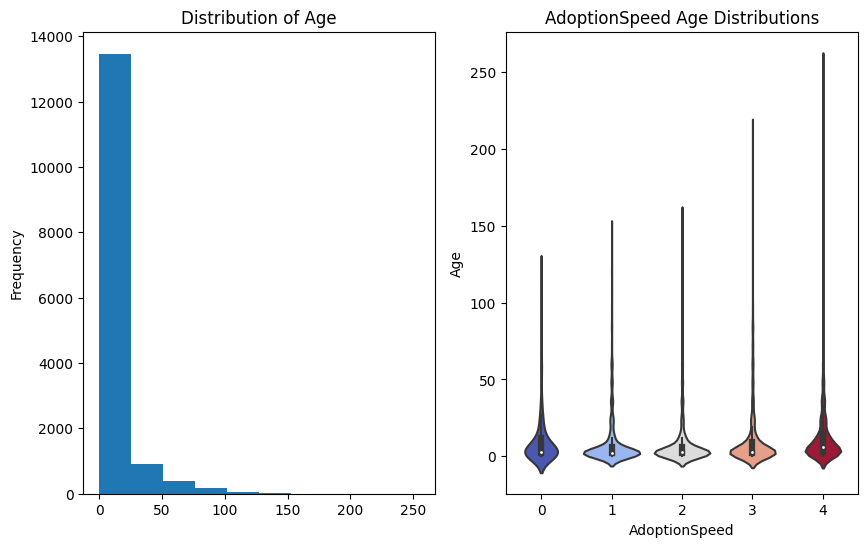

In [21]:
fig, axs = plt.subplots(1,2,figsize=(10,6))
target = "AdoptionSpeed"
df['Age'].plot(kind='hist',ax = axs[0])
sns.violinplot(x=target, y="Age", data=df, ax=axs[1], palette=colors, order = order)

axs[0].set_title("Distribution of Age")
axs[1].set_title("AdoptionSpeed Age Distributions")
plt.show()

Observations

* An overwhelming number of pets are very young, at 50 months old or younger, with more than half of the total number being less than 10 months old.

* There are a notable number of pets with their ages given as 12, 24, 36 months. It is likely that pet owners/individuals providing the Age details of pets gave it as an integer number in years, and hence may not be the exact age in months.

Due to the large right skew of the Age as a continuous value, there is also a provided engineered feature AgeBins which classifies the Ages into categories ranging from 1 month old, 2 months old, 3 to 5 months old (inclusive), up to a category comprising those of 60 months old and above. 

In [22]:
AgeBins_index_order = ['[  0,  2)','2', '[  3,  6)', '[  6, 12)', '[ 12, 24)', '[ 24, 60)',
       '[ 60,255]']

In [23]:
Age_value_counts = df.AgeBins.value_counts().reindex(AgeBins_index_order)
Age_value_counts

AgeBins
[  0,  2)    2483
2            3503
[  3,  6)    3670
[  6, 12)    1588
[ 12, 24)    1557
[ 24, 60)    1601
[ 60,255]     591
Name: count, dtype: int64

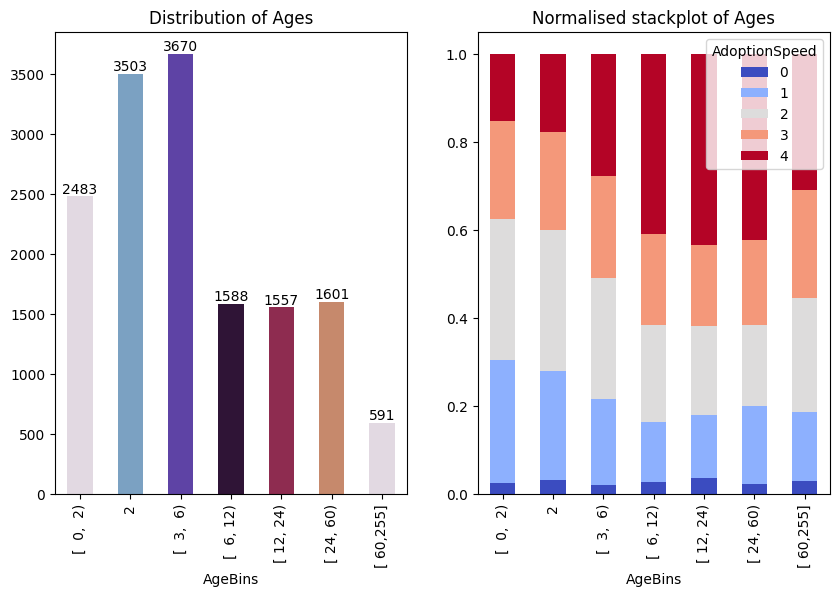

In [24]:
fig, axs = plt.subplots(1,2,figsize=(10,6))
target = "AdoptionSpeed"

p = Age_value_counts.plot.bar(ax = axs[0], color = plt.cm.twilight(np.linspace(0, 1, 7)))
Age_df = df.groupby("AgeBins")[target].value_counts(normalize=True).unstack().loc[AgeBins_index_order][order]
Age_df.plot.bar(stacked=True,color = colors,ax = axs[1])
p.bar_label(p.containers[0])
axs[0].set_title(f"Distribution of Ages")
axs[1].set_title(f"Normalised stackplot of Ages")
plt.show()

Generally majority of pets with AdoptionSpeed categories of 0 or 1 tend to be much younger, less than 15 months old. The lower AdoptionSpeed of 0 or 1 follows a decreasing trend as the average Age of the pets in their respective bins start to increase, while the proportion of those with AdoptionSpeed 4 starts to increase.

On the other hand, pets that are above 60 months old, which are in the minority, tend to be adopted later. The Age category of pets between 12 and 24 months old comprises the highest proportion of AdoptionSpeed 4, which can mean that most adoptions are for younger baby pets over even the more mature animals that are 12 months old already and above.

### Breed Information (Breed1, Breed2, BreedPure, BreedName)

In [25]:
df[["Breed1","Breed2","BreedPure","BreedName"]].head(10)

,Breed1,Breed2,BreedPure,BreedName
0,299,0,Y,Tabby
1,265,0,Y,Domestic Medium Hair
2,307,0,N,Mixed Breed
3,307,0,N,Mixed Breed
4,307,0,N,Mixed Breed
5,266,0,Y,Domestic Short Hair
6,264,264,Y,Domestic Long Hair
7,307,0,N,Mixed Breed
8,265,0,Y,Domestic Medium Hair
9,265,0,Y,Domestic Medium Hair


The exact breed of the dogs and cats are firstly given as a boolean BreedPure value where purebreds are given a value of Y and mixed breeds with N.

For purebreads, the breed is given in the BreedName column with its corresponding unique ID (between 0 and 306) given in Breed1.

For mixed breeds, the primary breed is given in Breed1 while the secondary Breed is given in Breed2.

In [26]:
df[df["BreedPure"] == "N"][["Breed1","Breed2","BreedPure","BreedName"]].head(10)

,Breed1,Breed2,BreedPure,BreedName
2,307,0,N,Mixed Breed
3,307,0,N,Mixed Breed
4,307,0,N,Mixed Breed
7,307,0,N,Mixed Breed
10,307,0,N,Mixed Breed
12,307,0,N,Mixed Breed
14,307,0,N,Mixed Breed
15,218,205,N,Terrier
17,307,307,N,Mixed Breed
18,307,0,N,Mixed Breed


... however the latter is not entirely true. There is an additional ID for the breed, 307, which is simply used to designate mixed breed animals whereby their individual breeds seem uncertain and are hence lumped into this category on its own. Only in cases where it can be distinguished what two breeds the pet comprises of, are individual breed IDs given for Breed1 and Breed2.

In [27]:
df[df["BreedPure"] == "Y"].Breed2.value_counts()

Breed2
0      6227
266     264
265      90
264      17
179      10
292       9
243       8
299       8
205       8
254       7
109       6
285       6
218       6
283       6
141       4
195       4
103       4
247       4
69        4
241       3
213       3
306       3
20        3
189       3
155       3
119       2
76        2
19        1
295       1
206       1
305       1
26        1
300       1
25        1
60        1
72        1
78        1
65        1
267       1
270       1
187       1
150       1
122       1
152       1
21        1
242       1
303       1
Name: count, dtype: int64

In [28]:
df[(df["BreedPure"] == "Y") & (df["Breed2"] != 0)][["Breed1","Breed2","BreedPure","BreedName"]]

,Breed1,Breed2,BreedPure,BreedName
6,264,264,Y,Domestic Long Hair
91,266,266,Y,Domestic Short Hair
106,266,266,Y,Domestic Short Hair
184,266,266,Y,Domestic Short Hair
239,179,179,Y,Poodle
...,...,...,...,...
14865,265,265,Y,Domestic Medium Hair
14868,266,266,Y,Domestic Short Hair
14884,265,265,Y,Domestic Medium Hair
14918,266,266,Y,Domestic Short Hair


In [29]:
len(df[(df["BreedPure"] == "Y") & (df["Breed2"] != df["Breed1"]) & (df["Breed2"] != 0)])

0

On the other hand, there are pets with Breed2 values given as non-0 but they are purebreds. Fortunately this appears to be an inconsistency in data collection for purebred animal cases where for some pets only Breed1 is filled in with Breed 2 given as empty, or both Breed1 and Breed2 columns filled with the same value. 

There are no mislabeled cases where both Breed1 and Breed2 are given different IDs and the pet is labeled as pure breed. 

Improvements: Despite this, there is a need to consistently label breeds by creating a new label indicating "Unknown mixed breed" and an actual hybrid name (e.g. Terrier+Shih Tzu) for mixed breeds with known species.

In [ ]:
len(df[(df["Breed1"] == 307) & (df["Breed2"] == 0)])

In [ ]:
len(df[(df["Breed1"] == 307) & (df["Breed2"] == 307)])

There are inconsistencies where breeds labeled as "307" or Mixed Breed having their labels repeated in Breed2 after being filled in Breed1. To ensure consistency in labelling, we will set Breed2 value to 0 for all those Breed1 = 307. 

In [30]:
df[df.BreedName.isna()][["Name","Breed1","Breed2","BreedPure","BreedName","Quantity"]]

,Name,Breed1,Breed2,BreedPure,BreedName,Quantity
391,Lil Milo,0,26,N,NaN,1
1045,Bella 4 Months Puppy!,0,307,N,NaN,1
3219,No Name,0,266,N,NaN,3
7285,"""Boy Boy""",0,307,N,NaN,1
7706,Looking Newborn Puppy For Adoption,0,205,N,NaN,1


There are 5 samples where the primary breed of the pets are given as "NaN". However in the BreedPure column they are all mixed breeds. Hence we can impute this missing data with "Unknown" designating these pets as mixed breeds whereby their primary breed is not confirmed, rather than pets wrongly classified as purebreds as only one breed ID is given for each sample.

In [32]:
Breed1_value_counts = df.Breed1.value_counts()
Breed1_value_counts

Breed1
307    5927
266    3634
265    1258
299     342
264     296
       ... 
176       1
214       1
125       1
123       1
81        1
Name: count, Length: 176, dtype: int64

In [33]:
BreedName_value_counts = df.BreedName.value_counts()
BreedName_value_counts

BreedName
Mixed Breed                   5927
Domestic Short Hair           3634
Domestic Medium Hair          1258
Tabby                          342
Domestic Long Hair             296
                              ... 
Pointer                          1
Staffordshire Bull Terrier       1
Irish Wolfhound                  1
Irish Terrier                    1
Dutch Shepherd                   1
Name: count, Length: 175, dtype: int64

In [31]:
BreedPure_value_counts = df.BreedPure.value_counts()
BreedPure_value_counts

BreedPure
N    8259
Y    6734
Name: count, dtype: int64

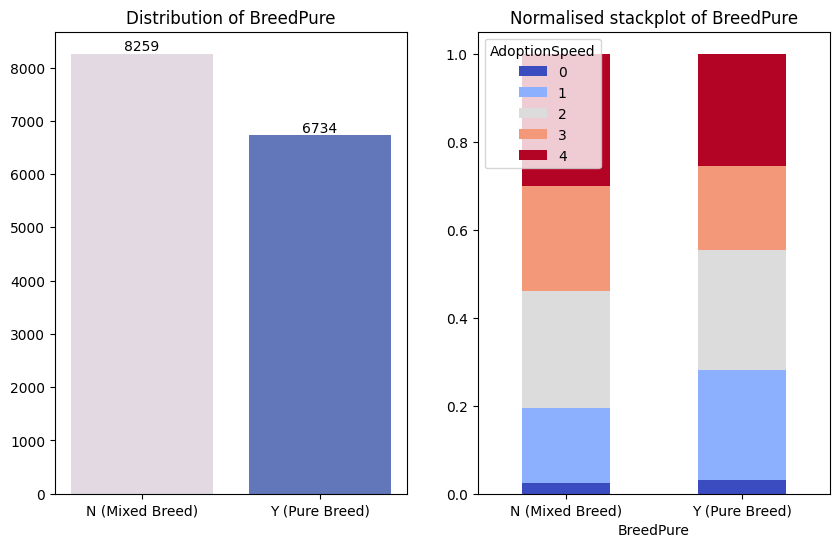

In [34]:
fig, axs = plt.subplots(1,2,figsize=(10,6))
target = "AdoptionSpeed"
p = axs[0].bar(height=BreedPure_value_counts.sort_index().values, 
                x=["N (Mixed Breed)","Y (Pure Breed)"],
                    color = plt.cm.twilight(np.linspace(0, 1, 5)))
axs[0].bar_label(p)
Type_df = df.groupby("BreedPure")[target].value_counts(normalize=True).unstack()[order]
Type_df.plot.bar(stacked=True,color = colors,ax = axs[1])

axs[0].set_title(f"Distribution of BreedPure")
axs[1].set_title(f"Normalised stackplot of BreedPure")
axs[1].set_xticklabels(["N (Mixed Breed)","Y (Pure Breed)"], rotation=0)
plt.show()

It seems that pure breed pets tend to be adopted faster.

### Gender

This feature gives the gender of the animals, with a "Mixed" label to account for mixed genders among animals where the Quantity is more than 1. 

In [35]:
Gender_value_counts = df.GenderName.value_counts()
Gender_value_counts

GenderName
Female    7277
Male      5536
Mixed     2180
Name: count, dtype: int64

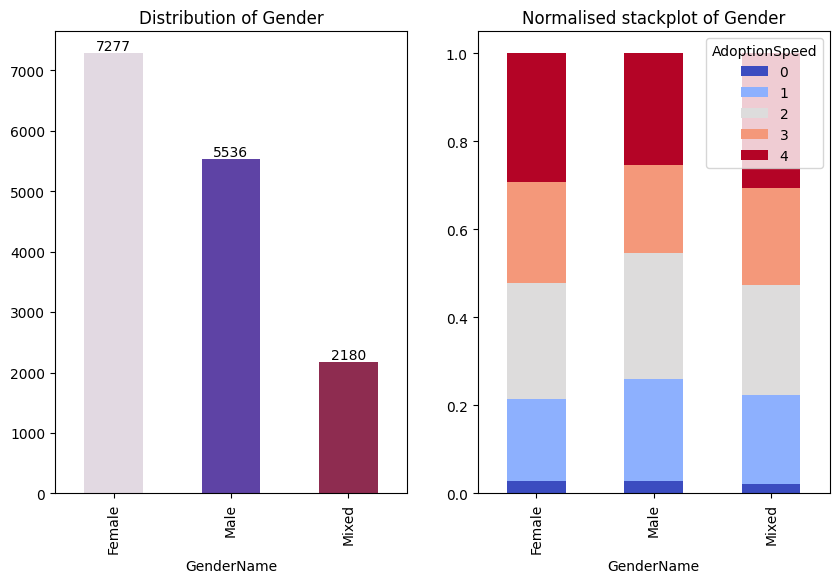

In [36]:
fig, axs = plt.subplots(1,2,figsize=(10,6))
target = "AdoptionSpeed"

p = Gender_value_counts.sort_index().plot.bar(ax = axs[0], color = plt.cm.twilight(np.linspace(0, 1, 4)))
Gender_df = df.groupby("GenderName")[target].value_counts(normalize=True).unstack()[order]
Gender_df.plot.bar(stacked=True,color = colors,ax = axs[1])
p.bar_label(p.containers[0])
axs[0].set_title(f"Distribution of Gender")
axs[1].set_title(f"Normalised stackplot of Gender")
plt.show()

Observations

* There are more female than male animals, both making up the majority of total samples. There are also 2180 pets labeled as "Mixed", which is close to the number of entries there are with a quantity of more than 2. 

* Males have a lower AdoptionSpeed than female animals.

* Although there are 2180 pets with "Mixed" genders there are far more pet samples that have Quantity of more than 1. Hence, there must be some Quantity or Gender labels that are mislabeled. The description and names may give a sense of what is the context the data was input as such.

In [37]:
len(df.loc[(df.Quantity == 1) & (df.GenderName == "Mixed")])

0

In [38]:
df.loc[(df.Quantity > 1) & (df.GenderName != "Mixed")][["Name","Quantity","Description","GenderName"]]

,Name,Quantity,Description,GenderName
7,Siu Pak & Her 6 Puppies,6,Siu Pak just give birth on 13/6/10 to 6puppies. Interested pls call or sms me. Left 2female puppies on 2/7/10,Female
21,Tigers,3,"Three puppies abandoned on the street, picked up and fed properly.Now active,healthy and cute.",Female
32,BoiBoi,5,"Boiboi is rescued by my daughter 2 years ago from outside her tuition place. He was sick and abandoned alone without the mother. Now he is very healthy, playful and gentle. He is not only playful but also toilet trained and well behave. I hope he can have new family with full of love and caring.",Male
33,No Name,2,"Two gorgeous kittens have just lost their mummy, and are looking for a loving home. Already on solid food. Potential adopters must be willing to spay, vaccinate, and love them as indoor cats. They've been together since birth, so preference will be given to those willing to welcome both. Existing experience with cats is also a big plus.",Female
36,No Name,3,she fat n healthy. in door cat,Female
...,...,...,...,...
14905,Toothless And Pury,2,"2 Cats must be adopted together. Toothless is a mix Persian cat, 1-year-old, male, color black and white Pury is pure breed Persian cat, 2 years old, male, color orange Cat cage, litter box, cat food and cat sand will be included. Mobile#",Male
14928,Peanut,3,Beautiful green eyes Pink nose Healthy Introvert compared to the other siblings Cute Not too playful,Female
14953,Blacky,3,They are abandoned cats and now waiting for you to give them a home.,Female
14970,KL Puppies For Adoption,2,One stray dog came to my house and gave birth to six little puppies. It would be very pity to roam around without proper care. I hope they can be adopted and be taken good care of. Anyone interested kindly PM me yeah :) Kindly help to share this post. *Four out of six puppies have been successfully adopted. We only left these two puppies. *For SERIOUS adopter only. Thank you.,Female


A quick glance at the description indicates some possibilities for the discrepancy in the Gender labels (given as either Male or Female) and the Quantity of pets present being more than 1. Here are some quotes from the descriptions out of the subset of samples with a Quantity of more than 1 but a specified Gender (either Male or Female) provided:

> Siu Pak just give birth on 13/6/10 to 6puppies. Interested pls call or sms me. Left 2female puppies on 2/7/10	

* Quantity was given as 6, the Gender was stated as "Female" as all the puppies are of the same gender hence the Gender can be unambiguously given. 

> Koko is an active female with 6 kittens. The kittens are cross between Domestic Short hair and American Tabby breed. Her color is Black while her offsprings are stripe black & white. They are about a month old.

* Quantity was given as 7 but the gender was given as "Female". In this case it is unclear what gender the offspring are of, but the "Female" Gender label was given to the indicate the parent of the 6 offspring. 

* Overall the Gender label appears to accurately either give the Gender of the single animal.

### Color Information (Color1, Color2, Color3, ColorAmt, ColorName)

In [39]:
df[["Color1","Color2","Color3","ColorAmt","ColorName"]].head(10)

,Color1,Color2,Color3,ColorAmt,ColorName
0,1,7,0,2,Black
1,1,2,0,2,Black
2,2,7,0,2,Brown
3,1,2,0,2,Black
4,1,0,0,1,Black
5,5,6,0,2,Cream
6,1,0,0,1,Black
7,1,2,7,3,Black
8,6,0,0,1,Gray
9,1,7,0,2,Black


In [40]:
color_labels_dict = color_labels.set_index('ColorID')['ColorName'].to_dict()
color_labels_dict[0] = "None"
color_labels_dict

{1: 'Black',
 2: 'Brown',
 3: 'Golden',
 4: 'Yellow',
 5: 'Cream',
 6: 'Gray',
 7: 'White',
 0: 'None'}

Colors are given as unique color IDs each corresponding to one of 7 colours. An additional "None" label is added to account for "0" values in columns for Color2 and Color3 in cases where the pet is of one or two colors at most. We convert the IDs back to the original colour names to look at the distribution of AdoptionSpeed by individual colour difference.

In [140]:
colors_df = df[["Color1","Color2","Color3","ColorAmt","AdoptionSpeed"]]
colors_df = colors_df.astype({'Color1': 'object','Color2': 'object','Color3': 'object'})
colors_df.loc[:,["Color1","Color2","Color3"]] = colors_df.loc[:,["Color1","Color2","Color3"]].replace(color_labels_dict)
colors_df.head()

,Color1,Color2,Color3,ColorAmt,AdoptionSpeed
0,Black,White,None,2,2
1,Black,Brown,None,2,0
2,Brown,White,None,2,3
3,Black,Brown,None,2,2
4,Black,None,None,1,2


ColorAmt refers to the number of colours a pet may have, capped at 3. It is unknown if pets that have more than 3 colours would be identified.

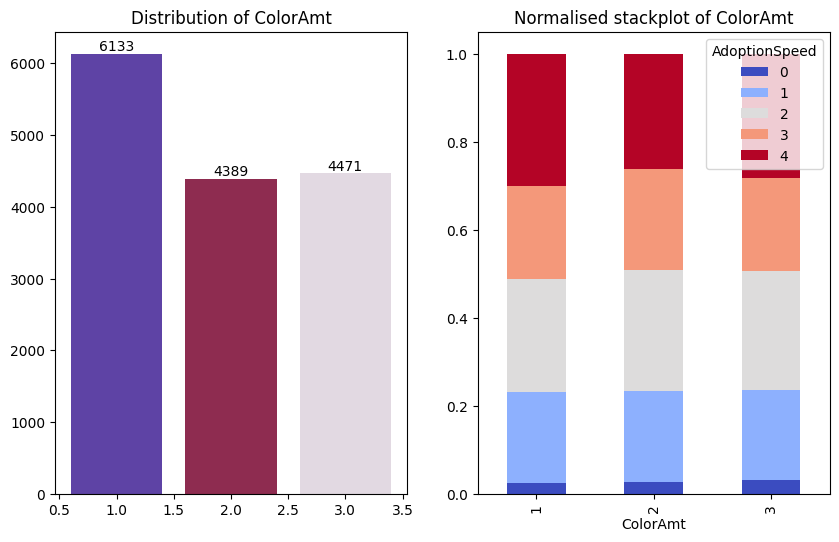

In [143]:
fig, axs = plt.subplots(1,2,figsize=(10,6))
ColorAmt_value_counts = df.astype({'ColorAmt': 'object'}).ColorAmt.value_counts()
target = "AdoptionSpeed"
p = axs[0].bar(height=ColorAmt_value_counts.sort_index().values, 
                x=ColorAmt_value_counts.sort_values().index,
                    color = plt.cm.twilight(np.linspace(0, 1, 4)))
axs[0].bar_label(p)
ColorAmt_df = df.groupby("ColorAmt")[target].value_counts(normalize=True).unstack()[order]
ColorAmt_df.plot.bar(stacked=True,color = colors,ax = axs[1])

axs[0].set_title(f"Distribution of ColorAmt")
axs[1].set_title(f"Normalised stackplot of ColorAmt")

plt.show()

The number of colours on a pet does not seem to affect adoption rates. Looking at the individual colours may help.

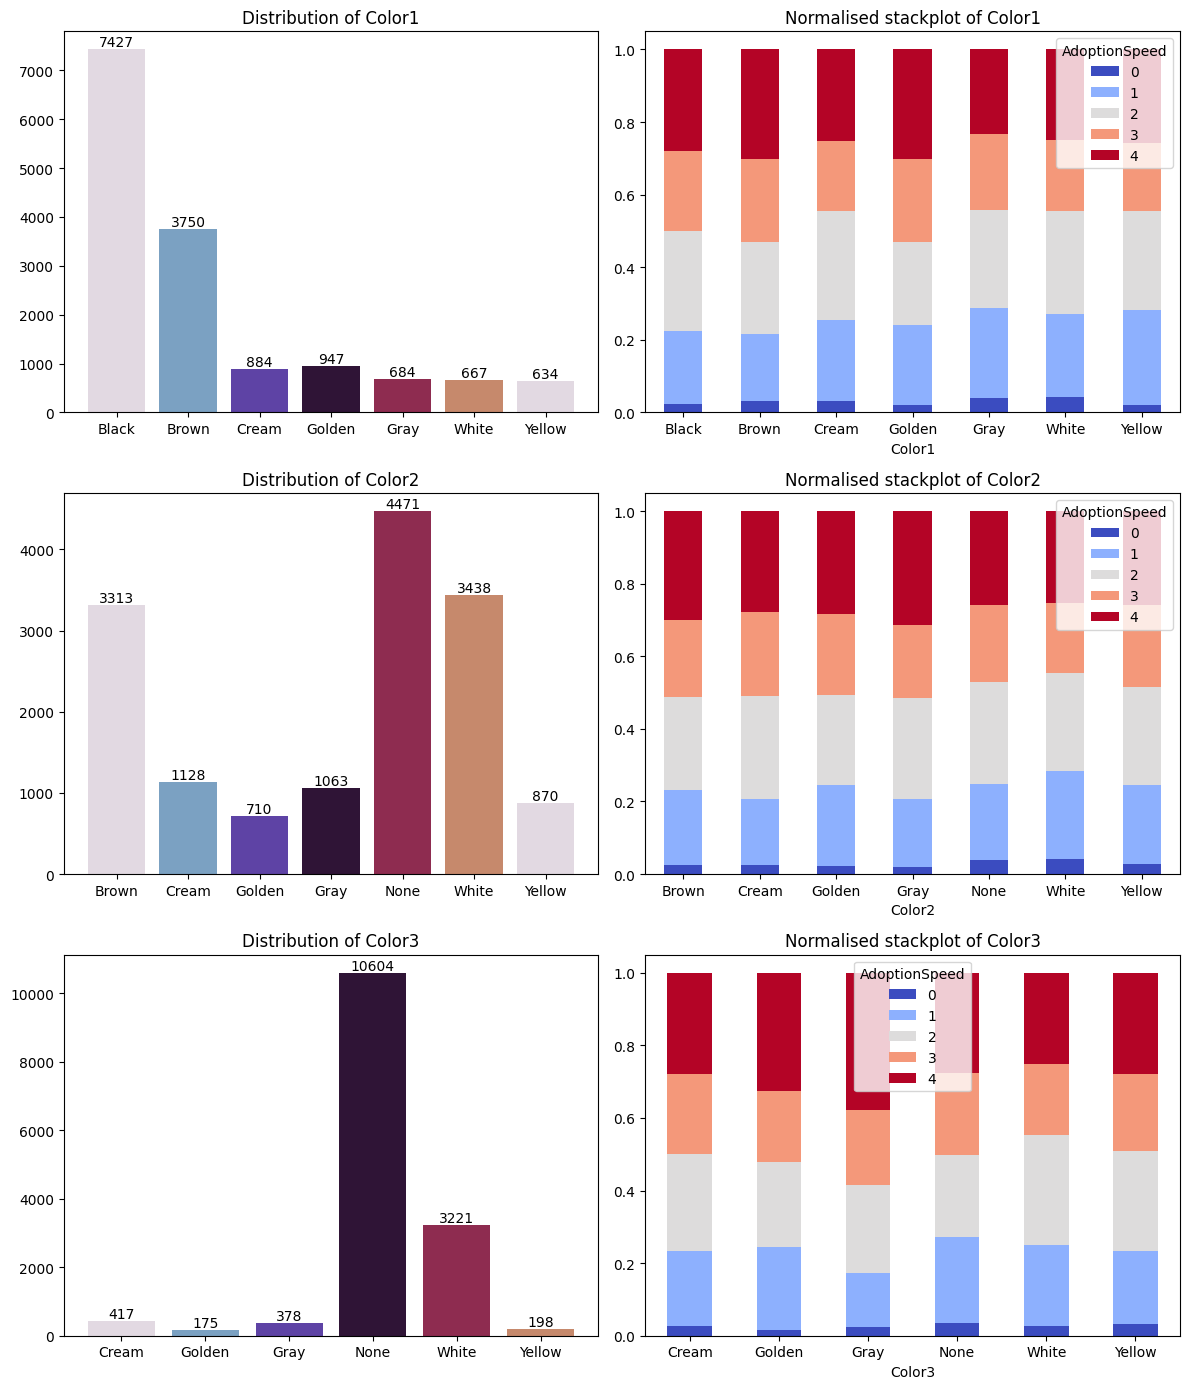

In [49]:
colors_df_cols = colors_df.columns[:3]
fig, axs = plt.subplots(3,2,figsize=(12,14))
# axs = axs.flatten()
target = "AdoptionSpeed"

for i, ColorX in enumerate(colors_df_cols):
    val_count = colors_df[ColorX].value_counts()
    p = axs[i,0].bar(height = val_count.sort_index().values, 
                x=val_count.index.sort_values(),
                    color = plt.cm.twilight(np.linspace(0, 1, 7)))
    Type_df = df.groupby(ColorX)[target].value_counts(normalize=True).unstack()[order]
    Type_df.plot.bar(stacked=True,color = colors,ax = axs[i,1])
    
    axs[i,0].bar_label(p)
    axs[i,0].set_title(f"Distribution of {ColorX}")
    axs[i,1].set_title(f"Normalised stackplot of {ColorX}")
    axs[i,1].set_xticklabels(colors_df[ColorX].value_counts().index.sort_values(), rotation=0)

plt.tight_layout()
plt.show()

In general, the lighter coloured pets like Gray, Golden and Cream have slightly shorter AdoptionSpeed than the darker Black, Brown or Gray. There is also a clear imbalance in the colour distribution as there are a lot more darker coloured pets than the lighter coloured ones.

Black and Brown are the most common colours. As "Black" is already listed under Color1, and is the most common colour, it is not given again in Color2 and Color3, and Brown is not repeated again in Color3. Hence, there is no repeat and as an example, if a particular sample is coloured black and white, Color1 will always be recorded as black and white is assigned as Color2, as there is no "Black" label for Color2 hence giving the labelling some level of consistency. It also implies that the degree of the color (whether a pet has some slight black patterns or has a mostly black coat) has no link with the ordering that it is listed under Color1, 2 or 3, and that the way it is listed is for consistency. 

We can analyse further by combining the 3 colour combinations and treating it as one "FullColor" that explicitly states the exact colour combination of the pet. Since there are many permutations we will just look at the top 12 most popular colour combinations.

In [44]:
colors_df["FullColor"] = colors_df["Color1"] + colors_df["Color2"] + colors_df["Color3"]

/tmp/ipykernel_33/1772788036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colors_df["FullColor"] = colors_df["Color1"] + colors_df["Color2"] + colors_df["Color3"]


In [45]:
FullColor_value_counts = colors_df['FullColor'].value_counts()[:12]
FullColor_value_counts

FullColor
BrownNoneNone       1460
BlackBrownNone      1417
BlackWhiteNone      1375
BlackBrownWhite     1159
BlackNoneNone       1002
BrownWhiteNone       929
WhiteNoneNone        667
CreamNoneNone        483
BlackGrayWhite       449
GrayWhiteNone        377
GoldenNoneNone       369
BlackYellowWhite     353
Name: count, dtype: int64

In [46]:
FullColor_df = FullColor_value_counts.index.sort_values()
FullColor_df

Index(['BlackBrownNone', 'BlackBrownWhite', 'BlackGrayWhite', 'BlackNoneNone',
       'BlackWhiteNone', 'BlackYellowWhite', 'BrownNoneNone', 'BrownWhiteNone',
       'CreamNoneNone', 'GoldenNoneNone', 'GrayWhiteNone', 'WhiteNoneNone'],
      dtype='object', name='FullColor')

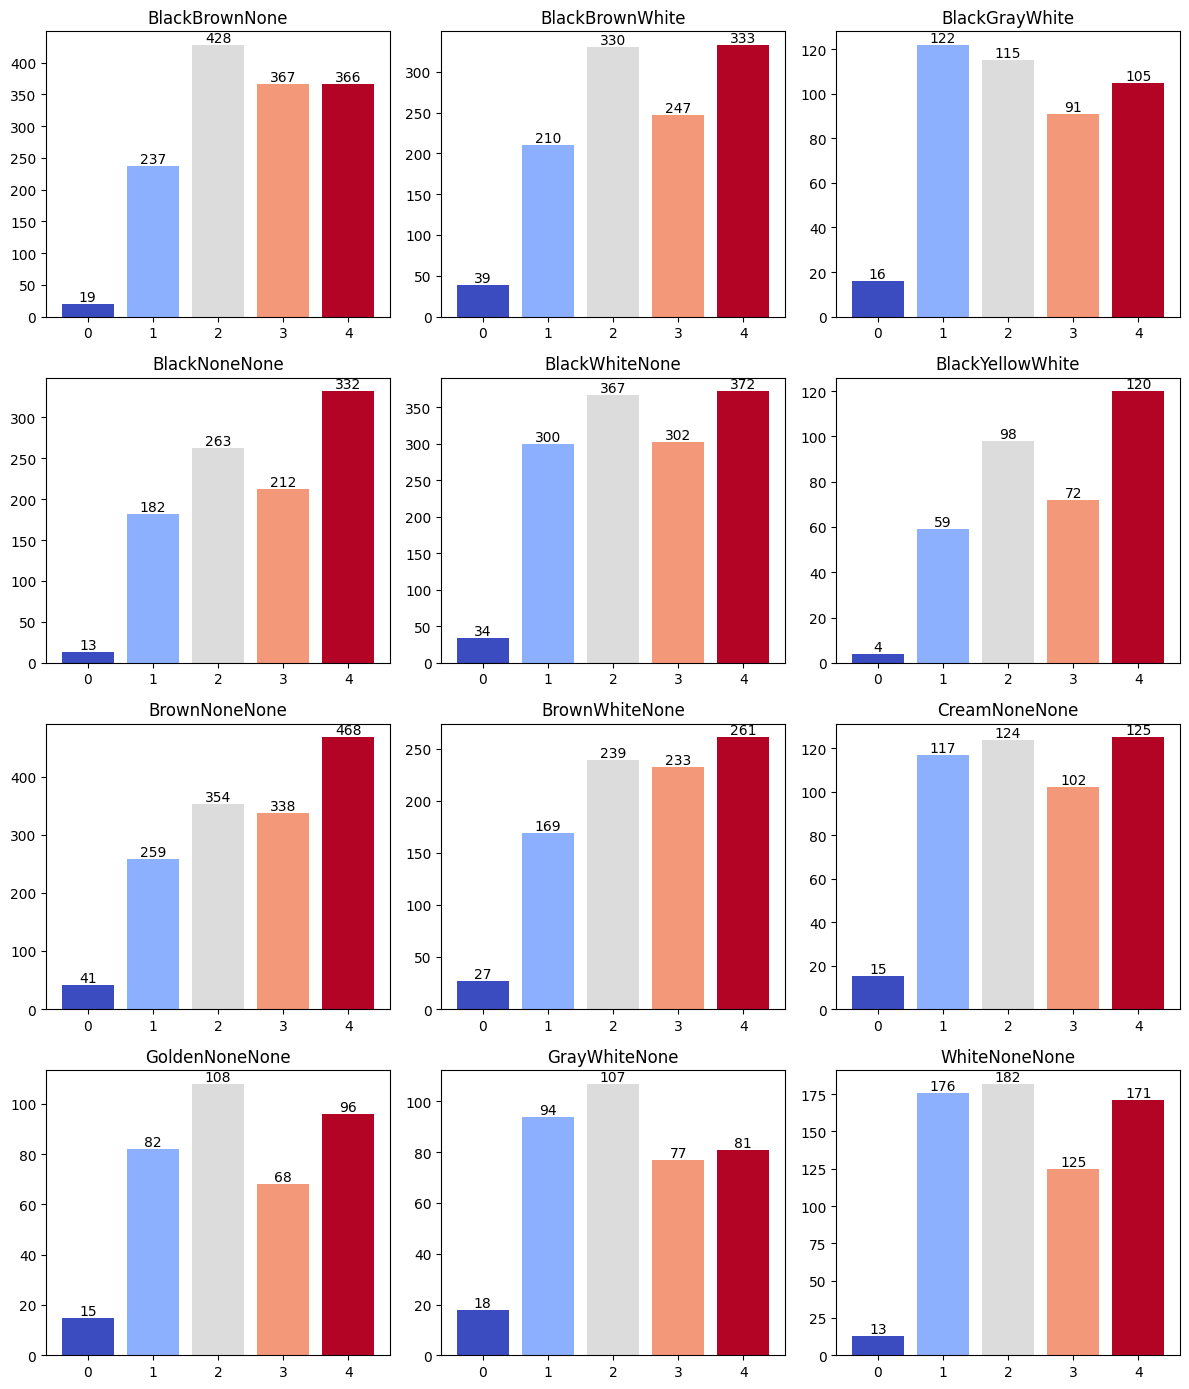

In [48]:
fig, axs = plt.subplots(4,3,figsize=(12,14))
axs = axs.flatten()
target = "AdoptionSpeed"
for var, subplot in zip(FullColor_df, axs):
    val_counts = colors_df.loc[colors_df.FullColor == var][target].value_counts()
    p = subplot.bar(height = val_counts.sort_index().values, 
                x=val_counts.index.sort_values(),
                    color = colors)
    
    subplot.bar_label(p)
    subplot.set_title(f"{var}")

plt.tight_layout()
plt.show()

Out of the 12 most common colour combinations we can see that there is little variation in AdoptionSpeed when considering the colour combination on the pets. 

### MaturitySize

In [50]:
MaturitySize_value_counts = df.MaturitySizeName.value_counts()
MaturitySize_value_counts

MaturitySizeName
Medium        10305
Small          3395
Large          1260
xtra Large       33
Name: count, dtype: int64

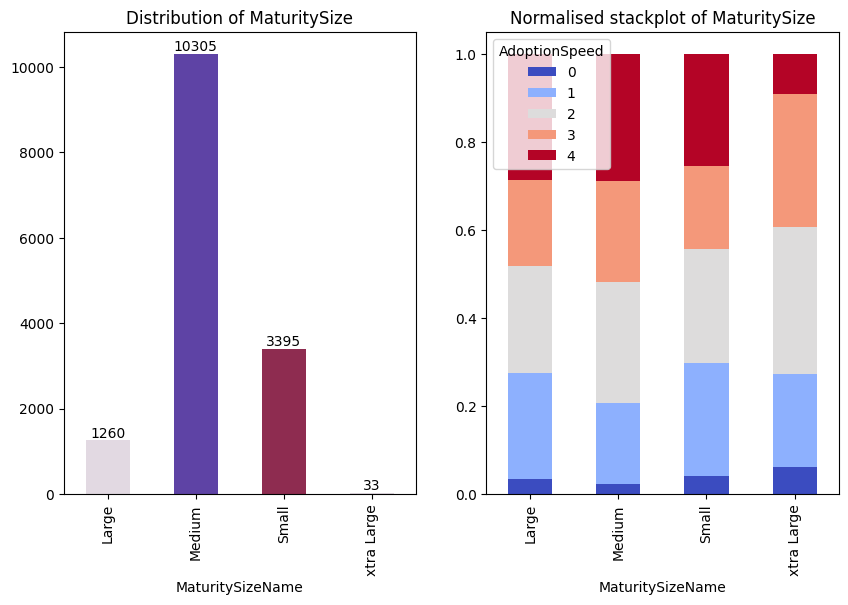

In [51]:
fig, axs = plt.subplots(1,2,figsize=(10,6))
target = "AdoptionSpeed"

p = MaturitySize_value_counts.sort_index().plot.bar(ax = axs[0], color = plt.cm.twilight(np.linspace(0, 1, 4)))
MaturitySize_df = df.groupby("MaturitySizeName")[target].value_counts(normalize=True).unstack()[order]
MaturitySize_df.plot.bar(stacked=True,color = colors,ax = axs[1])
p.bar_label(p.containers[0])
axs[0].set_title(f"Distribution of MaturitySize")
axs[1].set_title(f"Normalised stackplot of MaturitySize")
plt.show()

Observations

* Small and extra large pets are most likely to be adopted earlier.

* However, there are only 33 pets classified as extra large out of a sample size of 14993, hence this may be due to randomness and may not be representative. May consider combining the Large and xtra Large labels into one category due to the similar distribution in the AdoptionSpeed and the very small quantity of animals placed under the xtra Large category.

### FurLength

In [52]:
FurLength_value_counts = df.FurLengthName.value_counts()
FurLength_value_counts

FurLengthName
Small     8808
Medium    5361
Long       824
Name: count, dtype: int64

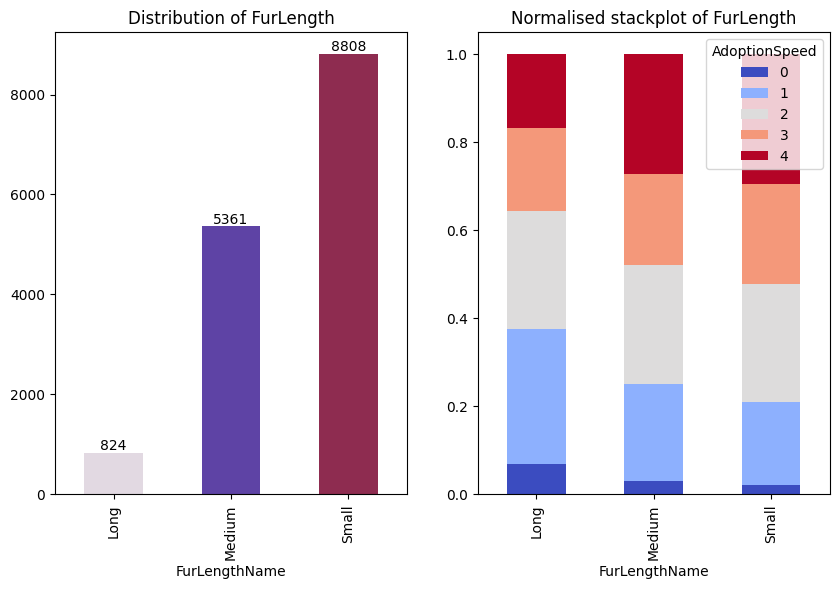

In [53]:
fig, axs = plt.subplots(1,2,figsize=(10,6))
target = "AdoptionSpeed"

p = FurLength_value_counts.sort_index().plot.bar(ax = axs[0], color = plt.cm.twilight(np.linspace(0, 1, 4)))
FurLength_df = df.groupby("FurLengthName")[target].value_counts(normalize=True).unstack()[order]
FurLength_df.plot.bar(stacked=True,color = colors,ax = axs[1])
p.bar_label(p.containers[0])
axs[0].set_title(f"Distribution of FurLength")
axs[1].set_title(f"Normalised stackplot of FurLength")
plt.show()

Observations

* Most pets have short fur, and long fur pets are the rarest.

* It seems that long fur pets have the highest adoption rate, but there are  fewer samples in this category as the short and medium fur pets. Therefore, this observation may be due to randomness.

### Health (Vaccinated, Dewormed, Sterilized, Health)

There are four features which indicate a particular health aspect of the pet, and one "Health" feature that focuses on degree of injury. The corresponding "Name" columns are the original 4 columns which had been label-encoded, converted back to the original string using the below key.

* Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
* Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
* Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
* Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)

As compared to the other features that have been discussed thus far, these features are mostly extrinsic in nature. Whereas the previous features of the pet usually involves its biological characteristics which cannot be modified or changed by human intervention such as gender, species, fur length and color, health characteristics can be improved with timely human intervention.

In [54]:
health_df = df[["VaccinatedName","DewormedName","SterilizedName","HealthName","AdoptionSpeed"]]

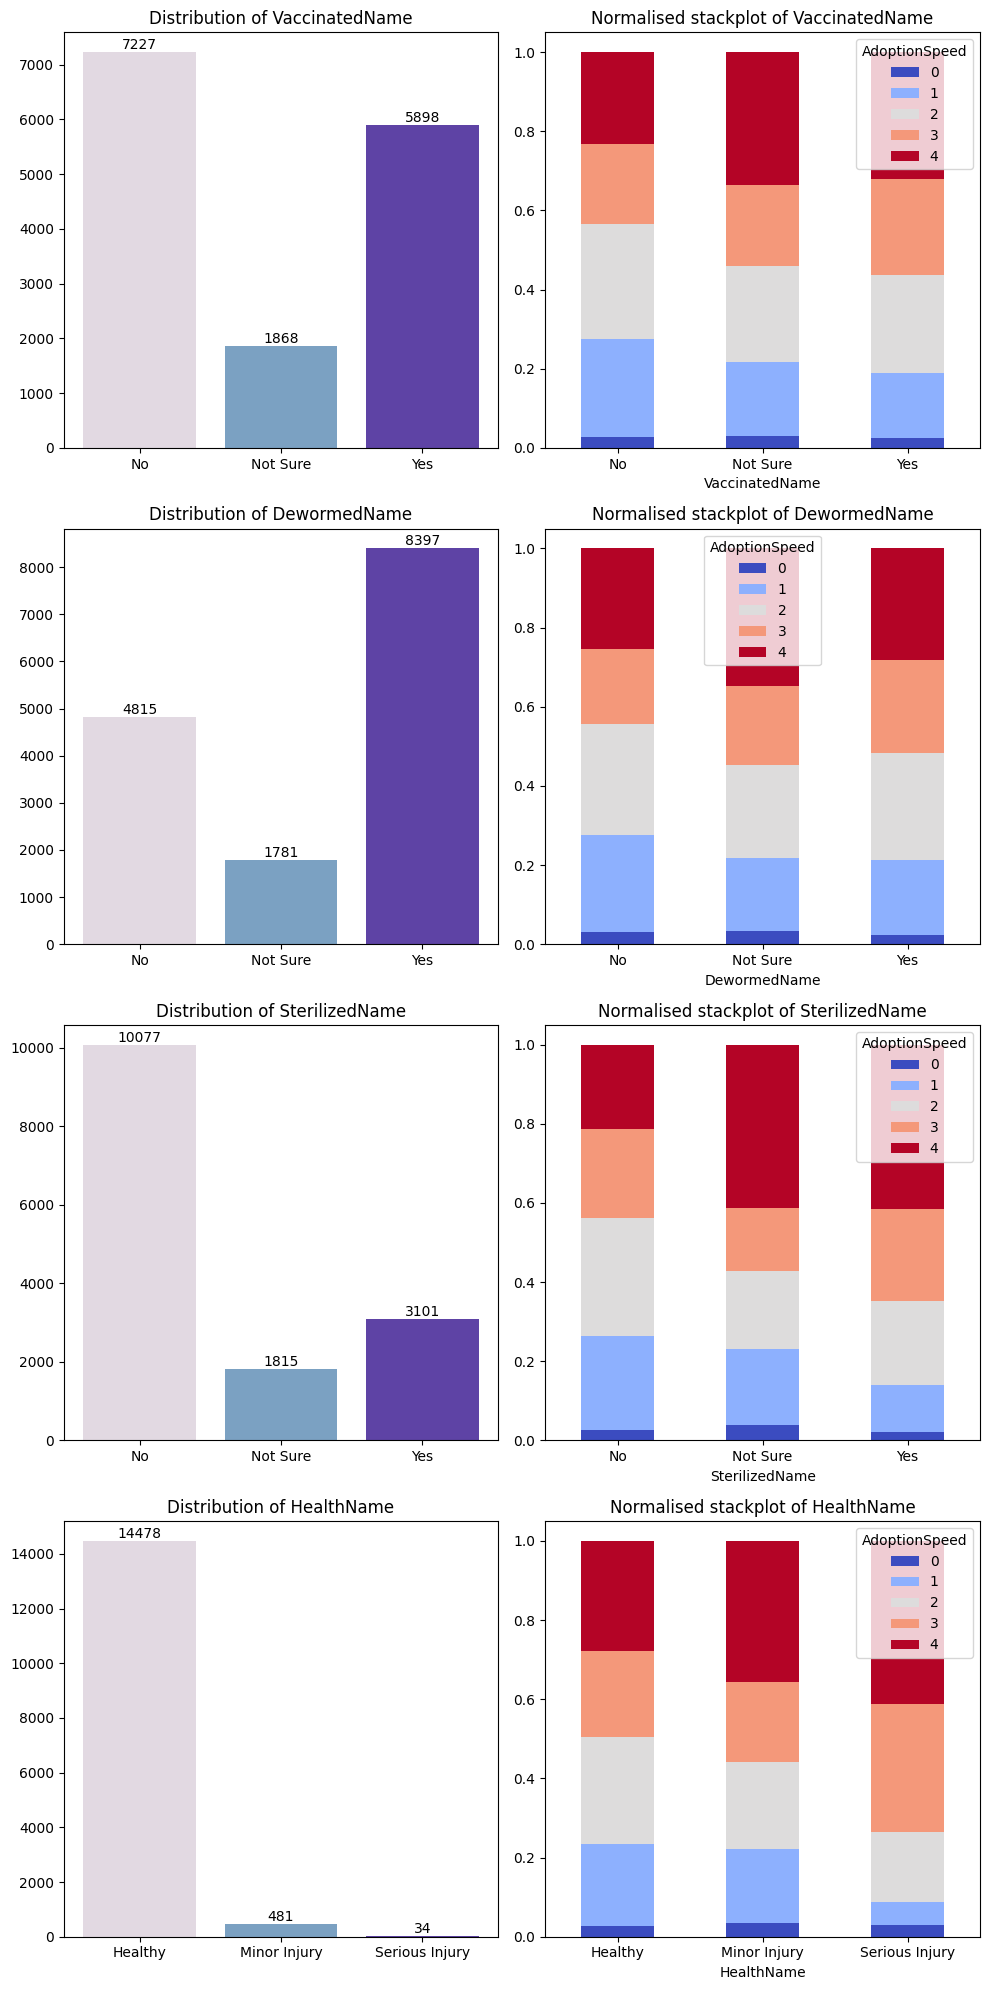

In [57]:
health_df_cols = health_df.columns[:4]
fig, axs = plt.subplots(4,2,figsize=(10,20))
# axs = axs.flatten()
target = "AdoptionSpeed"

for i, health_factor in enumerate(health_df_cols):
    val_count = health_df[health_factor].value_counts()
    p = axs[i,0].bar(height = val_count.sort_index().values, 
                x=val_count.index.sort_values(),
                    color = plt.cm.twilight(np.linspace(0, 1, 7)))
    Type_df = df.groupby(health_factor)[target].value_counts(normalize=True).unstack()[order]
    Type_df.plot.bar(stacked=True,color = colors,ax = axs[i,1])
    
    axs[i,0].bar_label(p)
    axs[i,0].set_title(f"Distribution of {health_factor}")
    axs[i,1].set_title(f"Normalised stackplot of {health_factor}")
    axs[i,1].set_xticklabels(health_df[health_factor].value_counts().index.sort_values(), rotation=0)

plt.tight_layout()
plt.show()

Observations

* Pets that are not vaccinated have a higher adoption rate, which is unusual as vaccinated pets are generally thought to be better in health. There are also slightly more pets that are unvaccinated than vaccinated, with a minority that are unknown. 

* Pets that are not dewormed also have slightly higher adoption rate compared to dewormed pets, though in this case there are more dewormed pets in the dataset than non-dewormed pets. Similarly, there are about 1800 entries which are unsure. 

* Pets that are not sterilised are the majority compared to sterilised pets, again with about 1800 pets where their sterilisation status is unknown. Non-sterilised pets have a higher adoption rate, however, which is again unusual as authorities recommend pets are sterilised by owners.

* Almost all of the pets are classified as healthy with only 500 or so pets that have reported minor or serious injury. Even in this small sample size, innjured pets have lower adoption rate than healthy pets.

* The number of "unsure" cases seem very similar in number at around 1800.

In [58]:
health_not_sure = df[(df["VaccinatedName"]== "Not Sure")&(df["DewormedName"]== "Not Sure")&(df["SterilizedName"]== "Not Sure")]
len(health_not_sure)

1003

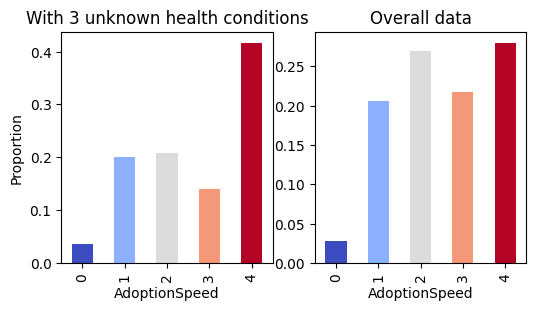

In [59]:
fig, axs = plt.subplots(1,2,figsize=(6,3))
# axs = axs.flatten()

for i, table in enumerate([health_not_sure, df]):
    val_count = table.AdoptionSpeed.value_counts(normalize=True)
    Type_df = val_count[order]
    Type_df.plot.bar(stacked=True,color = colors,ax = axs[i])
axs[0].set_title(f"With 3 unknown health conditions")
axs[0].set_ylabel(f"Proportion")
axs[1].set_title(f"Overall data")
plt.show()

* There are 1003 out of the 1800 pets with the 3 given health statuses as "unsure". A feature could be included that indicates whether this is True or False as it may indicate possible neglect of the pet or that it could be a rescued stray with little knowledge of the pet's history. This may affect its adoption rates.

* In general the AdoptionSpeed is higher for those with all 3 unknown health statuses.

### Quantity

In [60]:
Quantity_value_counts = df.Quantity.value_counts()
Quantity_value_counts

Quantity
1     11565
2      1422
3       726
4       531
5       333
6       185
7        84
8        52
9        33
10       19
20       12
11       10
12        6
15        4
17        3
16        3
14        2
13        2
18        1
Name: count, dtype: int64

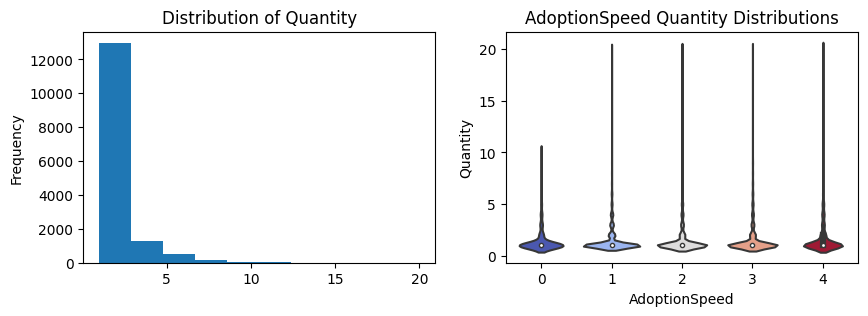

In [61]:
fig, axs = plt.subplots(1,2,figsize=(10,3))
target = "AdoptionSpeed"
df.Quantity.plot(kind='hist',ax = axs[0])
sns.violinplot(x=target, y="Quantity", data=df, ax=axs[1], palette=colors, order = order)

axs[0].set_title("Distribution of Quantity")
axs[1].set_title("AdoptionSpeed Quantity Distributions")
plt.show()

In [62]:
more_than_10 = df.loc[df.Quantity > 10]
len(more_than_10)

43

In [63]:
more_than_5 = df.loc[df.Quantity > 5]
len(more_than_5)

416

In [64]:
only_1 = df.loc[df.Quantity == 1]

Quantity refers to the number of pets under each entry. Ideally, each sample would be an individual pet as not all pets received in the same batch or they were simply registered as such as they are all offspring of the same parent or in the same litter, or found in a group. 

Let's take a look at some of the more samples comprising larger groups of pets. Out of the about 15k samples there are only 416 that have more than 5 pets in a group and out of those, 43 have more than 10 pets in a group. 

In [65]:
more_than_10[['Name', 'Quantity', 'AdoptionSpeed','Description']].head(10)

,Name,Quantity,AdoptionSpeed,Description
263,20 Little Puppies,20,4,"These are 20 puppies, from 2 stray mums need good homes. They are 2 weeks old. If you can give them a good home without caging or chaining, please whatsapp or msg Ms Grace Bong tel no:"
320,18 Cats For NEED HOMES!!,18,4,"YOU can CONTACT the couple at if you are interested. MORE pictures available here: THE HISTORY: They were basically abandoned by their previous owner who left them behind when he moved out. The couple that moved in was left to look after them and has slowly been finding homes for the cats over the last year. There were 28 to begin with and there are 18 left. The last 18 NEED HOMES URGENTLY as the couple is no longer able to care for them. Due to some personal issues, and a new baby then need to move out. None of the local pet associations are willing to take them on so it is once again left up to concerned caring citizens to help out and lend a hand. THIS is an URGENT call for HELP! These cats need homes within the NEXT TWO WEEKS. Please invite ALL your friends to this event which shall be on going until all the cats are rehomed. Invite them ALL because even if they themselves do not want a cat, they may know someone who knows someone who does. THANKS FOR CARING! soraya"
396,"Giant, Cookie & Snoopy. ! Thanks!",12,2,"puppies for adoption. Rescued by some good samaritans. No information on breeds, probably mongrels. All about a month old. They have been dewormed but not yet vaccinated. Cookie- female- Smaller than the rest but fiesty! Snoopy- male- Attention seeker. LOVES wagging his tail! Giant- male- Gentle giant. Very soft fur coat! Very playful! Some videos: Giant and his tennis ball- Giant playing with Snoopy- Giant being bullied- ------------------------------------------------------------------------------------------------ Due to the overwhelming response from my last email (I got close to emails/ sms/ calls), I am sorry but I need to lay down some ground rules. Thank you VERY VERY MUCH in advance for reading this email and forwarding it to your friends and family. Apologies in advance if the terms and conditions set out below are a little ""harsh"", but I have gotten too many emails from very rude people, calls from people who do not even know that it is NOT OK to call people at 2am, etc. Also, our intentions are very simple: WE JUST WANT TO FIND GOOD HOMES FOR THE PUPPIES. 1) Please DO NOT ask me what breed these are, they are stray puppies. If you want a pedigree Siberian Husky, please visit your neighbourhood pet shop. 2) These are large breed dogs, they will grow into a standard size dog. They are not toy dogs, hence not suitable for those who live in an apartment/ condominium. 3) Please DO NOT delete my email with all these information and just forward the photos. I get too many people asking me for information which I have already given in the first place. 4) This email is dated 2 February . This is to manage your expectations on whether the puppy you fell in love with is still available. 5) We reside in Seri Kembangan, KL, near the Astro office (there is someone at home 95% of the time). Please only contact us if you are willing to come to our house to pick the puppies up. It will also mean that we get a chance to meet the new ""owners"" to see whether they are suitable for the puppies. We want to find good homes for the puppies and ensure that they do not get kicked out into the streets once they are grown and lose their cuteness. Those who are interested and agreeable to the above 5 points, please read on: 6) The puppies are free, but as a gesture of sincerity, we hope you can donate RM50 to either SPCA or PAWS. You can pass us the money when you pick up the puppy. We will donate on your behalf and mail you the receipt in your name. If for any reason you cannot afford this token donation, please let us know the reason why, we are very reasonable people. 7) You will need to let us know some basic information about yourself as f

In [66]:
only_1[['Name', 'Quantity', 'AdoptionSpeed','Description']].head(10)

,Name,Quantity,AdoptionSpeed,Description
0,Nibble,1,2,Nibble is a 3+ month old ball of cuteness. He is energetic and playful. I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled. The result was this little kitty. I do not have enough space and funds to care for more cats in my household. Looking for responsible people to take over Nibble's care.
1,No Name Yet,1,0,I just found it alone yesterday near my apartment. It was shaking so I had to bring it home to provide temporary care.
2,Brisco,1,3,"Their pregnant mother was dumped by her irresponsible owner at the roadside near some shops in Subang Jaya. Gave birth to them at the roadside. They are all healthy and adorable puppies. Already dewormed, vaccinated and ready to go to a home. No tying or caging for long hours as guard dogs. However, it is acceptable to cage or tie for precautionary purposes. Interested to adopt pls call me."
3,Miko,1,2,"Good guard dog, very alert, active, obedience waiting for her good master, plz call or sms for more details if you really get interested, thanks!!"
4,Hunter,1,2,"This handsome yet cute boy is up for adoption. He is the most playful pal we've seen in our puppies. He loves to nibble on shoelaces , Chase you at such a young age. Imagine what a cute brat he will be when he grows. We are looking for a loving home for Hunter , one that will take care of him and give him the love that he needs. Please call urgently if you would like to adopt this cutie."
5,No Name,1,2,"This is a stray kitten that came to my house. Have been feeding it, but cannot keep it."
6,BULAT,1,1,anyone within the area of ipoh or taiping who interested to adopt my cat can contact my father at this number (mazuvil)or can just email me. currently bulat is at my hometown at perak but anyone outside the area still want to adopt can travel there to my hometown.there is a lot of cats in my house rite now..i think i should let one of them go to a better owner who can give better attention to him.
8,No Name,1,1,"healthy and active, feisty kitten found in neighbours' garden. Not sure of sex."
9,Kitty,1,4,"Very manja and gentle stray cat found, we would really like to find a home for it because we cannot keep her for ourselves for long. Has a very cute high pitch but soft meow. Please contact me if you would be interested in adopting."
10,Bear,1,1,"For serious adopter, please do sms or call for more details, thanks!"


Similar to the Age label, we are also looking at a large imbalance in the dataset for this particular label. Add to that, it was found when analysing the Gender column that sometimes for Quantities more than 1, the descriptions explaining the context would often bring up the number of pets in that partiular group brought up for adoption and often does not seem to match the Quantity label given. 

Take for instance this particular sample of a pet with the name given as "Bailey", which seems to indicate a singular animal and not a litter of 20 animals as the provided quantity:

> Bailey is an obedient and loyal dog Her owner is terminaaly ill and is unable to care for her	

Fortunately on the other hand, those which have a Quantity of 1 often matches the singular pet mentioned in the description.

Hence, rather than having such a high cardinality there is an engineered feature QuantityBins which narrow down the categories and places the minority categories (which are also likely to be more inaccurately labeled, with Quantity labels not often matching the description). 

In [68]:
QuantityBins_index_order = ["1","2","3","4","5",">=6"]

In [69]:
QuantityBins_counts = df.QuantityBins.value_counts().reindex(QuantityBins_index_order)
QuantityBins_counts

QuantityBins
1      11565
2       1422
3        726
4        531
5        333
>=6      416
Name: count, dtype: int64

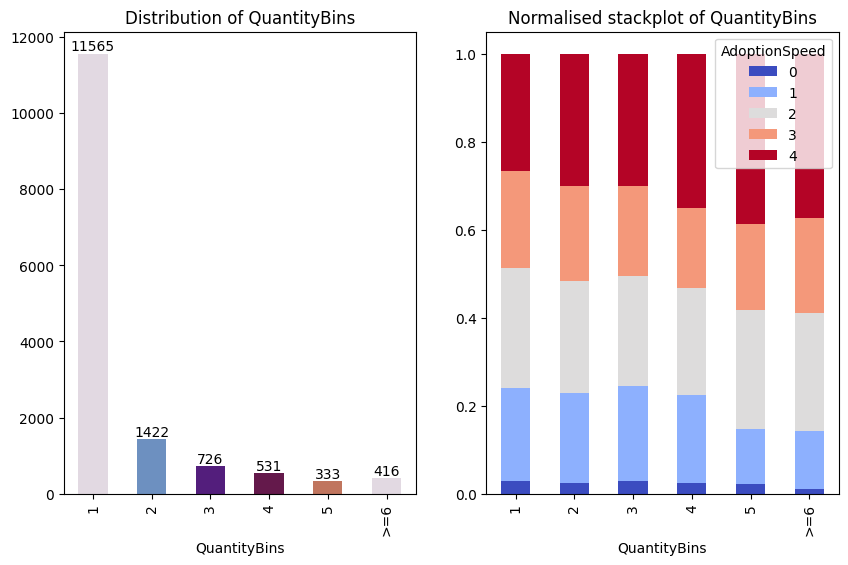

In [70]:
fig, axs = plt.subplots(1,2,figsize=(10,6))
target = "AdoptionSpeed"

p = QuantityBins_counts.plot.bar(ax = axs[0], color = plt.cm.twilight(np.linspace(0, 1, 6)))
QuantityBins_df = df.groupby("QuantityBins")[target].value_counts(normalize=True).unstack()[order]
QuantityBins_df.plot.bar(stacked=True,color = colors,ax = axs[1])
p.bar_label(p.containers[0])
axs[0].set_title(f"Distribution of QuantityBins")
axs[1].set_title(f"Normalised stackplot of QuantityBins")
plt.show()

Observations

* The adoption rates tend to decrease as the Quantity increases. 

* As seen from the descriptions, some of those giving up the animals for adoption (former owners or breeders) prefer the multiple animals be adopted together (some of which are all offspring of the same parent or were found together), however this additional requirement would be one possible contributor resulting in a larger AdoptionSpeed.

### Fee

In [71]:
Fee_counts = df.Fee.value_counts()
Fee_counts[0:10]

Fee
0      12663
50       468
100      408
200      219
150      162
20       136
300      120
30       103
250       92
1         82
Name: count, dtype: int64

In [72]:
df.Fee.max()

3000

Fee refers to the adoption fee paid by whoever is adopting the animal(s) listed in each sample. This ranged from a value of 0 (meaning free adoption) to a value of 3000 paid (likely in Malaysian Ringgit, given the source of the data).

While a large majority of the pet adoption fees are 0 the rest are mostly given as round numbers in multiples of 50, and a minority falling outside of these categories. 

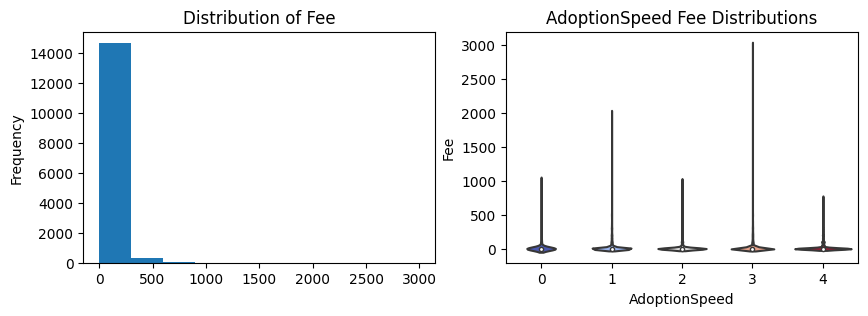

In [73]:
fig, axs = plt.subplots(1,2,figsize=(10,3))
target = "AdoptionSpeed"
df.Fee.plot(kind='hist',ax = axs[0])
sns.violinplot(x=target, y="Fee", data=df, ax=axs[1], palette=colors, order = order)

axs[0].set_title("Distribution of Fee")
axs[1].set_title("AdoptionSpeed Fee Distributions")
plt.show()

The fees are right skewed as a result of the large number of pets, more than 12000 out of the almost 15000 pets, that are adopted without paying a fee. To improve the distribution of the data around this feature, there is an engineered FeeBins feature that categorises the fees into 4 distinct groups of 0, 1 to 99, 100 to 199 and 200 dollars and above.

In [74]:
FeeBins_index_order = ["0","[   1, 100)","[ 100, 200)","[ 200,3000]"]

In [75]:
FeeBins_counts = df.FeeBins.value_counts().reindex(FeeBins_index_order)
FeeBins_counts

FeeBins
0              12663
[   1, 100)     1062
[ 100, 200)      626
[ 200,3000]      642
Name: count, dtype: int64

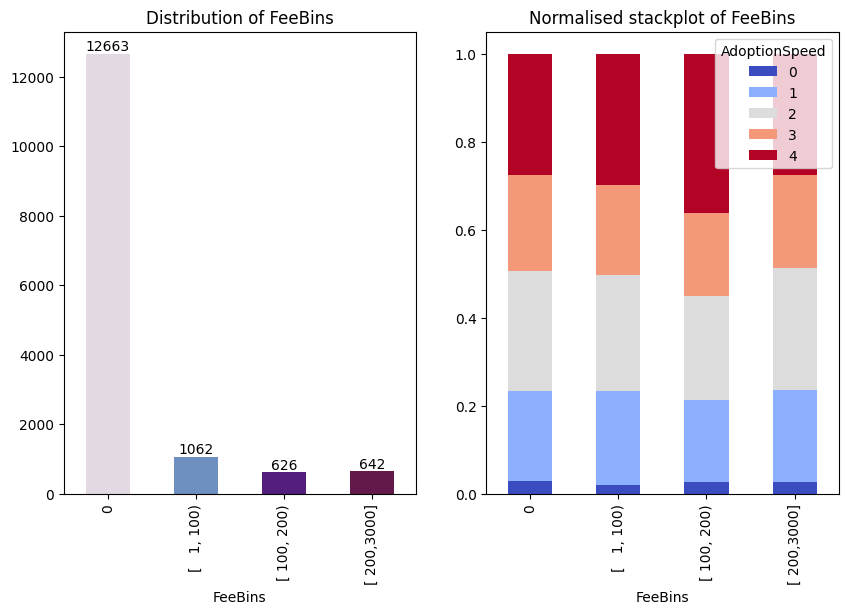

In [76]:
fig, axs = plt.subplots(1,2,figsize=(10,6))
target = "AdoptionSpeed"

p = FeeBins_counts.plot.bar(ax = axs[0], color = plt.cm.twilight(np.linspace(0, 1, 6)))
FeeBins_df = df.groupby("FeeBins")[target].value_counts(normalize=True).unstack().loc[FeeBins_index_order][order]
FeeBins_df.plot.bar(stacked=True,color = colors,ax = axs[1])
p.bar_label(p.containers[0])
axs[0].set_title(f"Distribution of FeeBins")
axs[1].set_title(f"Normalised stackplot of FeeBins")
plt.show()

The category with Fees of between 100 and 200 have a higher proportion of pets with AdoptionSpeed 4 . Although this feature may not be very good at distinguishing the AdoptionSpeed as the sample size for the other categories that are not free adoptions are much smaller.

### State

In [77]:
State_counts = df.StateName.value_counts()
State_counts

StateName
Selangor           8714
Kuala Lumpur       3845
Pulau Pinang        843
Johor               507
Perak               420
Negeri Sembilan     253
Melaka              137
Kedah               110
Pahang               85
Terengganu           26
Sabah                22
Kelantan             15
Sarawak              13
Labuan                3
Name: count, dtype: int64

In [78]:
StateBinsName_counts = df.StateBinsName.value_counts()
StateBinsName_counts

StateBinsName
Selangor           8714
Kuala Lumpur       3845
Pulau Pinang        843
Johor               507
Perak               420
Others              411
Negeri Sembilan     253
Name: count, dtype: int64

State refers to the state which the pets originated from, given as a unique 5 digit ID representing each of the 14 states of Malaysia, while the modified StateName feature shows the actual names of the states. 

There is a large class imbalance in that most of the pet data originates from two states, Selangor and KL. To deal with the minority data coming from 7 of the states whereby there are a total of less than 200 samples from each, they have been combined and categorised under the "Others" label in the StateBinsName feature to reduce the cardinality of the StateNames feature.

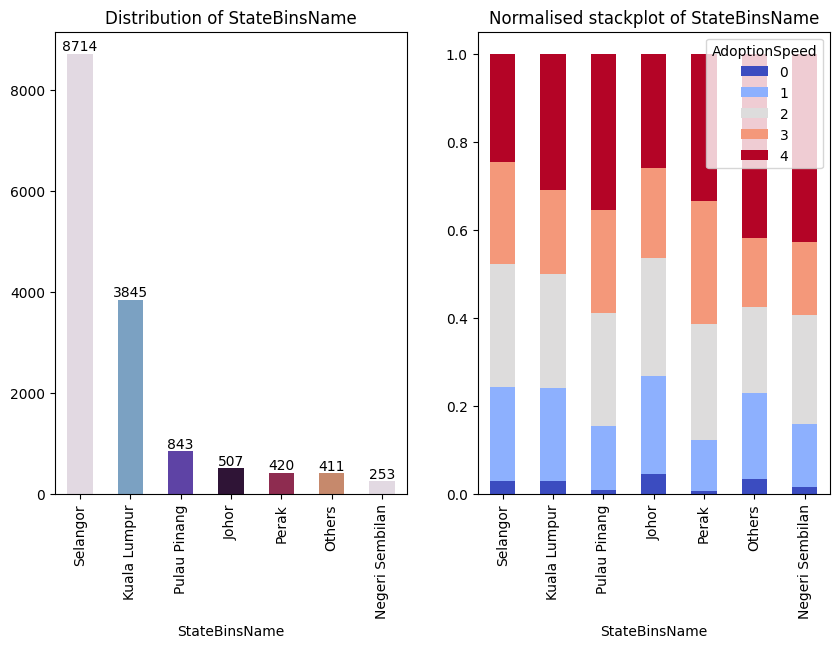

In [79]:
fig, axs = plt.subplots(1,2,figsize=(10,6))
target = "AdoptionSpeed"

p = StateBinsName_counts.plot.bar(ax = axs[0], color = plt.cm.twilight(np.linspace(0, 1, 7)))
StateBinsName_df = df.groupby("StateBinsName")[target].value_counts(normalize=True).unstack().loc[StateBinsName_counts.index][order]
StateBinsName_df.plot.bar(stacked=True,color = colors,ax = axs[1])
p.bar_label(p.containers[0])
axs[0].set_title(f"Distribution of StateBinsName")
axs[1].set_title(f"Normalised stackplot of StateBinsName")
plt.show()

Observations

* The largest proportion of the shortest AdoptionSpeed of 0 and 1 are the pets that originate from Johor, while pets from Perak have the smallest proportion.

* The largest proportion of the longest AdoptionSpeed of 4 are pets from Negeri Sembilan, while pets from Selangor, also where the majority of the pets originate from, have the smallest proportion of AdoptionSpeed 4.

### RescuerID

In [80]:
RescuerID_counts = df.RescuerID.value_counts()
RescuerID_counts

RescuerID
fa90fa5b1ee11c86938398b60abc32cb    459
aa66486163b6cbc25ea62a34b11c9b91    315
c00756f2bdd8fa88fc9f07a8309f7d5d    231
b53c34474d9e24574bcec6a3d3306a0d    228
ee2747ce26468ec44c7194e7d1d9dad9    156
                                   ... 
89bc6d71d57ad5d7e952ed76559345c5      1
8cfafc812c500eee7c112911ef668ce9      1
8512e22c06a01cdc76481ff0a6e88b67      1
48de9ff092328d54b2b371bc72b07b03      1
79309f4027f2fedb4349a298c69fe56f      1
Name: count, Length: 5595, dtype: int64

In [81]:
len(RescuerID_counts)

5595

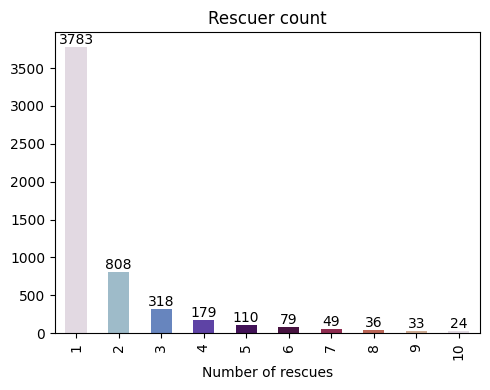

In [112]:
fig, axs = plt.subplots(1,1,figsize=(5,4))
p = RescuerID_counts.value_counts()[0:10].plot.bar(ax = axs,color = plt.cm.twilight(np.linspace(0, 1, 10)))
p.bar_label(p.containers[0])
axs.set_title("Rescuer count")
axs.set_xlabel("Number of rescues")
plt.tight_layout()
plt.show()

In [84]:
len(RescuerID_counts[RescuerID_counts > 10])

176

In [86]:
only_1_rescued = RescuerID_counts[RescuerID_counts == 1]
only_1_df = df[df.RescuerID.isin(only_1_rescued.index)]

In [87]:
only_1_df.StateName.value_counts()

StateName
Selangor           2011
Kuala Lumpur       1152
Johor               162
Pulau Pinang        146
Perak               120
Negeri Sembilan      65
Melaka               50
Kedah                23
Pahang               16
Sabah                13
Sarawak              11
Terengganu            7
Kelantan              6
Labuan                1
Name: count, dtype: int64

RescuerID refers to the unique ID hash of each rescuer. There are 5595 unique rescuers in total, with the each of the top 5 rescuers in terms of most animals rescued having a count of more than 150 each. 

Since the identities of the rescuers are hashed we can assume that some of these IDs could refer to groups or organisations as it is unlikely one person could have rescued, in the case of the top rescuer, registered more than 400 entries. 

Out of these top 5 entities, 3 of them registered rescues in Selangor while the 4th and 5th in the ranking registered in KL. This could explain why the majority of the samples are registered in Selangor and KL which are the top two locations where these adopted pets are from.

Most rescuers are probably individuals that have only registered one animal or one group of animals once. Among those who have only registered one rescue, majority of the cases originate in Selangor and KL as well. 

In [88]:
top_5_rescuers = RescuerID_counts[0:5]
top_5_rescuers_index = top_5_rescuers.index

In [89]:
top_5_df = df[df.RescuerID.isin(top_5_rescuers_index)]

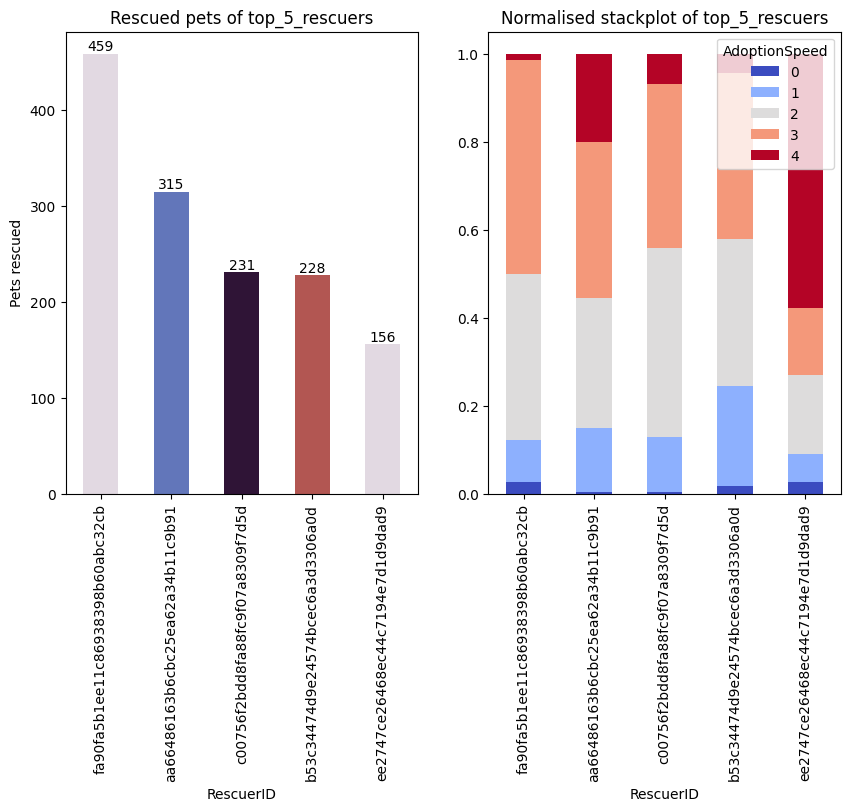

In [90]:
top_5_rescuers = RescuerID_counts[0:5]
fig, axs = plt.subplots(1,2,figsize=(10,6))
target = "AdoptionSpeed"

p = top_5_rescuers.plot.bar(ax = axs[0], color = plt.cm.twilight(np.linspace(0, 1, 5)))
top_5_rescuers_df = top_5_df.groupby("RescuerID")[target].value_counts(normalize=True).unstack().loc[top_5_rescuers_index][order]
top_5_rescuers_df.plot.bar(stacked=True,color = colors,ax = axs[1])
p.bar_label(p.containers[0])
axs[0].set_title(f"Rescued pets of top_5_rescuers")
axs[0].set_ylabel(f"Pets rescued")
axs[1].set_title(f"Normalised stackplot of top_5_rescuers")
plt.show()

We can see that the adoption rates for the top rescuer is better than the others with the lowest number of cases among their rescues that have an AdoptionSpeed of 4. On the other hand, the 5th ranking entity performed the worst in this aspect, and has an overwhelming majority compared to the other 4 in terms of cases where the AdoptionSpeed is 4. 

### VideoAmt and PhotoAmt

These features refer to the total number of videos and photos uploaded for the pets. 

In [91]:
VideoAmt_counts = df.VideoAmt.value_counts()
VideoAmt_counts

VideoAmt
0    14419
1      417
2       92
3       36
4       15
5        7
6        4
8        2
7        1
Name: count, dtype: int64

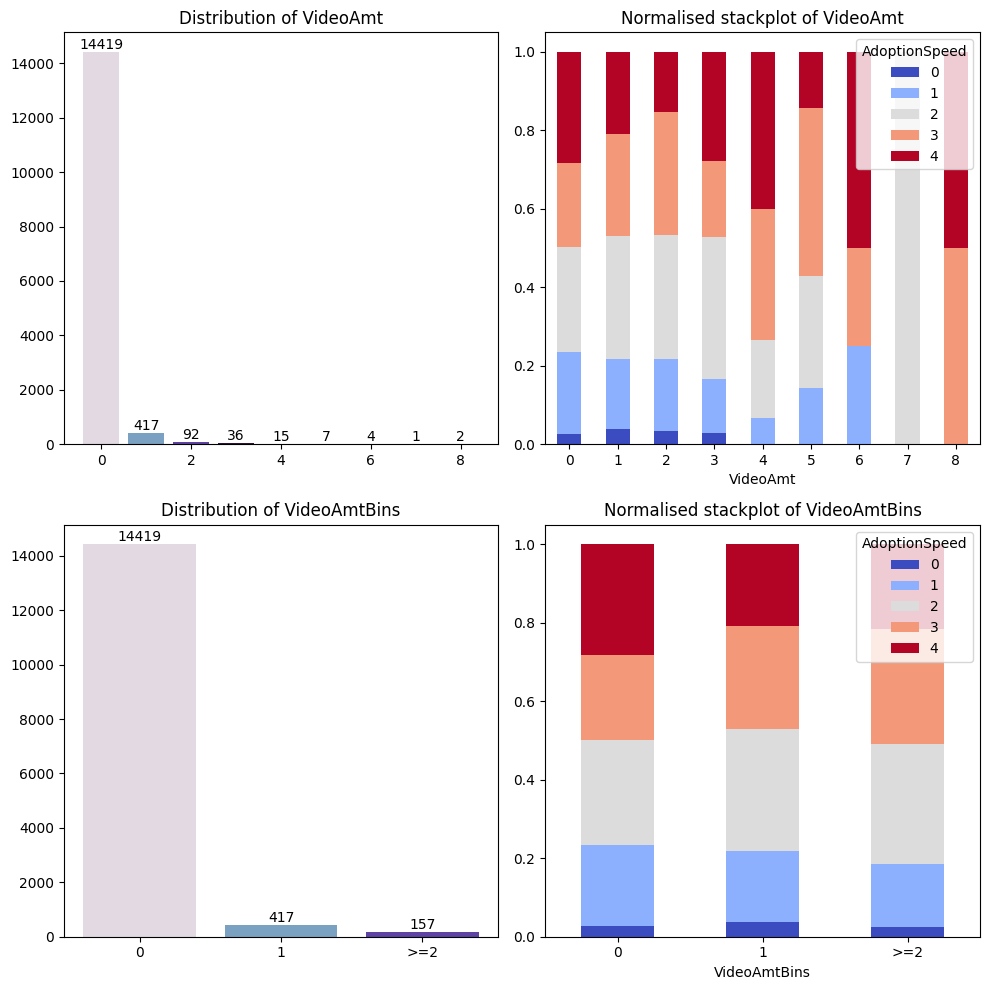

In [95]:
VideoAmt_df_cols = ["VideoAmt","VideoAmtBins"]
fig, axs = plt.subplots(2,2,figsize=(10,10))
# axs = axs.flatten()
target = "AdoptionSpeed"

for i, col in enumerate(VideoAmt_df_cols):
    val_count = df[col].value_counts()
    p = axs[i,0].bar(height = val_count.sort_index().values, 
                x=val_count.index.sort_values(),
                    color = plt.cm.twilight(np.linspace(0, 1, 7)))
    Type_df = df.groupby(col)[target].value_counts(normalize=True).unstack()[order]
    Type_df.plot.bar(stacked=True,color = colors,ax = axs[i,1])
    
    axs[i,0].bar_label(p)
    axs[i,0].set_title(f"Distribution of {col}")
    axs[i,1].set_title(f"Normalised stackplot of {col}")
    axs[i,1].set_xticklabels(df[col].value_counts().index.sort_values(), rotation=0)

plt.tight_layout()
plt.show()

The number of pets with 0 videos is 14419 which makes up pretty much all the data. At this point, any pets with videos provided are as good as outliers. VideoAmtBins is still too right skewed, so this feature may not be very good at predicting AdoptionSpeed.

In [101]:
PhotoAmt_counts = df.PhotoAmt.value_counts().sort_index()
PhotoAmt_counts

PhotoAmt
0      341
1     3075
2     2518
3     2511
4     1881
5     2147
6      621
7      432
8      314
9      231
10     190
11     184
12      97
13      86
14      78
15      50
16      39
17      27
18      18
19      20
20      25
21      16
22       9
23      12
24      15
25       8
26      10
27       6
28       7
29       6
30      19
Name: count, dtype: int64

In [99]:
df.PhotoAmt.describe()

count    14993.000000
mean         3.889215
std          3.487810
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         30.000000
Name: PhotoAmt, dtype: float64

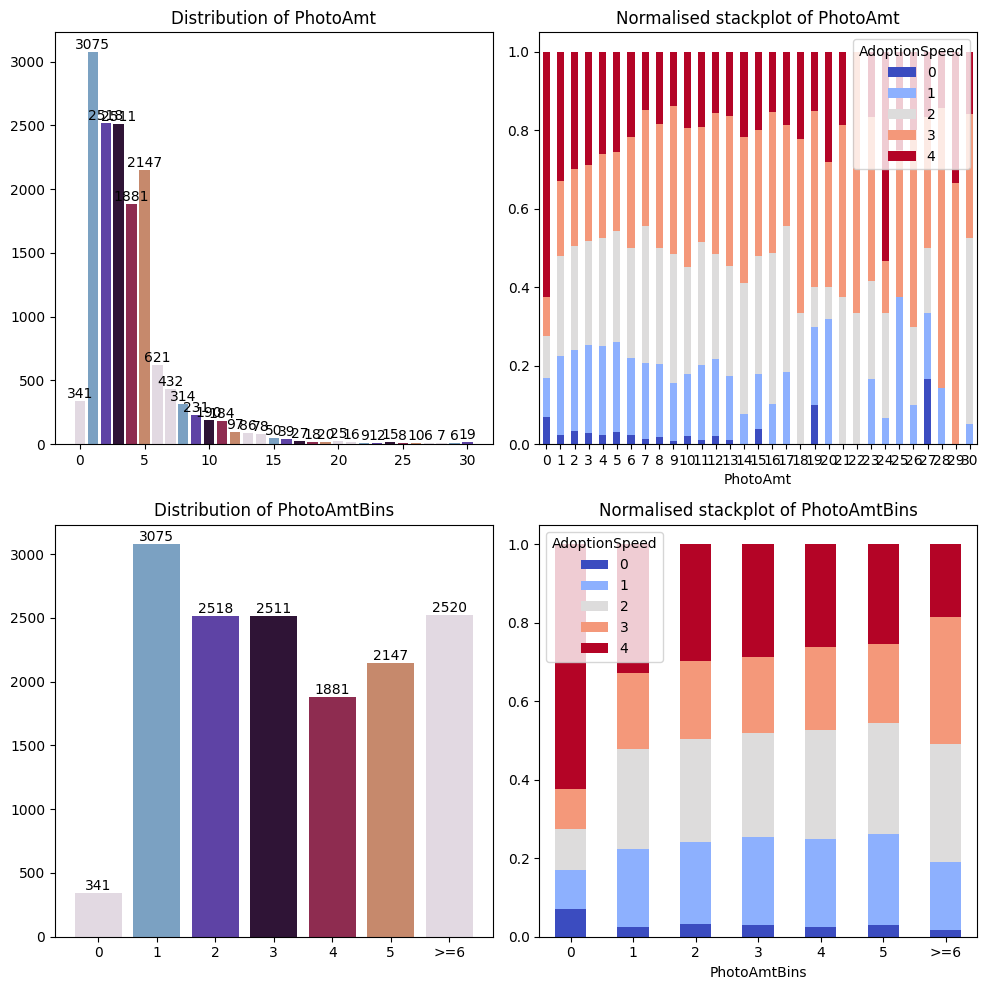

In [110]:
PhotoAmt_df_cols = ["PhotoAmt","PhotoAmtBins"]
fig, axs = plt.subplots(2,2,figsize=(10,10))
# axs = axs.flatten()
target = "AdoptionSpeed"

for i, col in enumerate(PhotoAmt_df_cols):
    val_count = df[col].value_counts()
    p = axs[i,0].bar(height = val_count.sort_index().values, 
                x=val_count.index.sort_values(),
                    color = plt.cm.twilight(np.linspace(0, 1, 7)))
    PhotoAmt_df = df.groupby(col)[target].value_counts(normalize=True).unstack()[order]
    PhotoAmt_df.plot.bar(stacked=True,color = colors,ax = axs[i,1])
    
    axs[i,0].bar_label(p)
    axs[i,0].set_title(f"Distribution of {col}")
    axs[i,1].set_title(f"Normalised stackplot of {col}")
    axs[i,1].set_xticklabels(df[col].value_counts().index.sort_values(), rotation=0)

plt.tight_layout()
plt.show()

Observations

* Number of pets with 0 photos are only 341 out of the about 15000 samples. 

* Adoption rate seems to go up with photo count, but PhotoAmt values are also right skewed just as with the VideoAmt, albeit by not as much. 

* PhotoAmtBins seem to divide up evenly the dataset into more evenly distributed groups, although samples labeled with "0" are in their own category as the AdoptionSpeed distribution among samples in this group mostly tend to have a higher AdoptionSpeed value. 

* The trend is clear using this feature: As the amount of uploaded photos increase, from none at all to having at least 6 photos, there is a lower overall average AdoptionSpeed.

### Description

Description contains the profile write-up for each pet/group of pets. The primary language used is English, with some in Malay or Chinese. 

Without delving too deep into using NLP for analysis as to whether description can be a good predictor of adoption rates, we can see if there are any noticeable observations between descriptions for pets that are adopted faster vs those that are adopted later.

In [122]:
description_df = df[["AdoptionSpeed","Description"]]

In [123]:
description_df.loc[df.AdoptionSpeed == 0].head(10)

,AdoptionSpeed,Description
1,0,I just found it alone yesterday near my apartment. It was shaking so I had to bring it home to provide temporary care.
75,0,Hi Coco is a rescued puppy from the streets. If you would like to adopt her pls contact me. She is very active and is very friendly with other dogs.
106,0,"Kittens found living at restaurant, with sibling fostering until we find a home for them. See mate as Samantha on petfinder. Uncertain of sex at this time, will pay fee for neuter or spay if you wish to adopt this cat, Pre-paid with vet at the time of adoption. Please contact Mel at for details about kitten."
170,0,"*** Looking for someone who really love and adore cats....And someone can share their love and spare a time for him *** *** Own Pick up / Collection : Call To Make Arrangement *** *** Must adopt 2 of them, for the play together *** Interested Please Call : (Emy)"
259,0,Chanelle found a home!
260,0,Very well taken care dog
410,0,A good baby girl. To be spayed when old enough.
411,0,"Dijumpai berkeliaran di sekitar pulau indah,klang. Telah melahirkan 4 ekor anak yang telah di adopted."
477,0,Looking for a home for popo Don't have the time to take care of her
579,0,"#already been booked I'm trying to find a new home for this girls asap because I could no longer take care of them. I have few cats already. And the mother had given birth to this kitties. And the other two siblings. I also need to let them go asap because I'm going to neuter the mother. They have started eating but still once in a while having breastfeed from the mommy. That's why I need to let them go. These babies are very active and playful. But a little bit shy. These girls are special because they followed the mother's rosette pattern and colors. They are all alike and that's why I'm posting them as a group. If there is any loving person who could take care of these kitties, please adopt them either all together or by one. Kindly call me asap for adoption. Thank you. :)"


In [124]:
description_df.loc[df.AdoptionSpeed == 4].head(10)

,AdoptionSpeed,Description
9,4,"Very manja and gentle stray cat found, we would really like to find a home for it because we cannot keep her for ourselves for long. Has a very cute high pitch but soft meow. Please contact me if you would be interested in adopting."
15,4,"We moved out of our apartment to a landed home and there were many friendly strays in the neighbourhood. My grandma's neighbour was moving homes and was looking for a home for their pet.I pleaded with my mom to let us adopt him and he's fun-loving, he plays football and is a great goalie yet a loyal guardog. Now we are moving abroad and Max has no home."
17,4,shes active... she can obey wht command that u told her.. example shakeshand . sleep and eat .. command in english n tamil :).. she will bark if thr suspicius ppl... good for guard act like a male dog..she will sleept in mattres or cradle..whn she eat u can even touch her...we let her because no time to care she... so anyybody intrested to addopt plss call to.. im Mr.Tom..thx petfinder..
19,4,"Birth Date: Oct 30th Kitty 1, Melly -Female Sangat comel and vokal. Kitty 2, Tootsie - Male Badan putih, tapi ekor hitam and telinga kekuning-kuningan, macam kucing 3 color. Kitty 3, Bo -Male Corak badan 3 tompok, he is one of the most quite and lightest kitty of the litter tapi jantan. Kitty 4, Michii - Female Macam abang kembar, she is very subtle and sweet, have 1 big spot behind her back and 1 super cute spot belakang telinga. Kitty 5, Missy - Female. She is very curious and adventurous. Very lovable, with sweet voice !"
21,4,"Three puppies abandoned on the street, picked up and fed properly.Now active,healthy and cute."
22,4,"My cats name is Kenit, Kenot,Owen, Keyad, Manja, Techit and 4 Kittens, Baby and family. All my cats are pamper."
23,4,"Donut is a friendly doggie and very domesticated. She will bark at strangers and will not run out of the house. Needs a cage as her sleeping bed, she likes to lie in there. Her former owner abandoned her after she had demodex. She is cured now. Vaccination and neutering fees to be borne by adopter. Please call if you can give her a home."
32,4,"Boiboi is rescued by my daughter 2 years ago from outside her tuition place. He was sick and abandoned alone without the mother. Now he is very healthy, playful and gentle. He is not only playful but also toilet trained and well behave. I hope he can have new family with full of love and caring."
34,4,Open for adoption!!!
36,4,she fat n healthy. in door cat


In [130]:
description_df.loc[:,"Desc_length"] = description_df.Description.apply(lambda x: len(str(x)))

<Axes: xlabel='AdoptionSpeed', ylabel='Desc_length'>

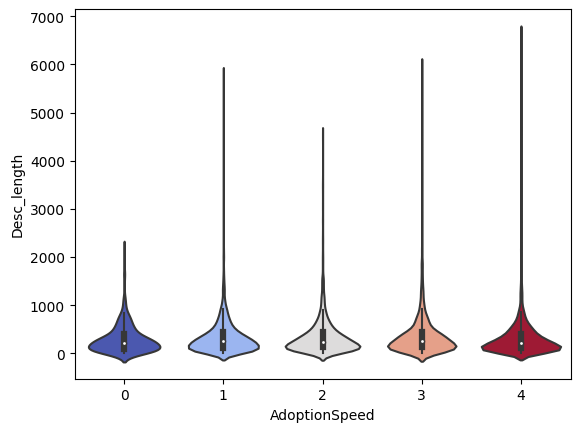

In [144]:
sns.violinplot(x=target, y="Desc_length", data=description_df, palette=colors, order = order)

Descriptions with shorter character counts seem to indicate pets with higher adoption rates, but otherwise it is not a very discerning feature.